In [1]:
import numpy as np
import torch
import os
from pathlib import Path
import glob
import matplotlib.pyplot as plt
from torch.distributions import Categorical

from tangram import Tangram
from mctsnettree import MCTSnetTree
%matplotlib inline

In [17]:
torch.set_default_dtype(torch.float64)

seed=123
render=True
gpu=True
gamma=0.9

n_grid = 20
n_blocks = 4
n_possible_blocks = 6
chunk_type = 7
n_blocks_H = 0
embedding_size = 32
n_simuls = 10 #25
n_evals = 100

serialization_path = './models/mcts1/hierarchical_blocks_{}'.format(n_blocks_H)
print('serialization_path: ',serialization_path)
# create folder 
Path(serialization_path).mkdir(parents=True, exist_ok=True)

serialization_path:  ./models/mcts1/hierarchical_blocks_0


In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if gpu and torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)
else:
    torch.manual_seed(seed)
    device = "cpu"
    if gpu:
        gpu = False
torch.set_num_threads(os.cpu_count() - 1)
print("Running on Device = ", device)
filesave_paths_mcts1 = sorted(glob.glob(f'{serialization_path}/mcts1_e*'))
mcts1 = torch.load(open(filesave_paths_mcts1[-1],'rb'))
n_episodes = int(filesave_paths_mcts1[-1][44:50])
running_reward = float(filesave_paths_mcts1[-1][52:].replace('.pt',''))
print('Loaded MCTSnet from '+ filesave_paths_mcts1[-1])
seed += n_episodes
env = Tangram(seed, n_grid, n_blocks, n_possible_blocks, chunk_type, n_blocks_H)

Running on Device =  cpu
Loaded MCTSnet from ./models/mcts1/hierarchical_blocks_0/mcts1_e300000_p0.565479656619199.pt


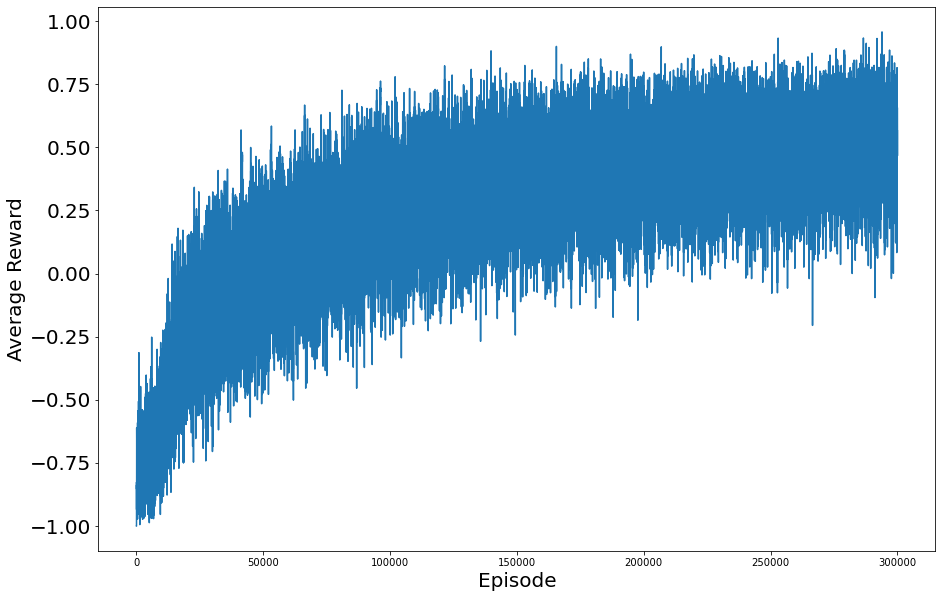

In [19]:
running_rewards = mcts1.get_running_rewards()
fig = plt.figure(figsize=(15,10))

plt.plot(running_rewards)
plt.xlabel('Episode',fontsize=20)
#plt.xticks([0,1000,2000,3000,4000],['0','1000','2000','3000','4000'],fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Average Reward',fontsize=20)
plt.show()

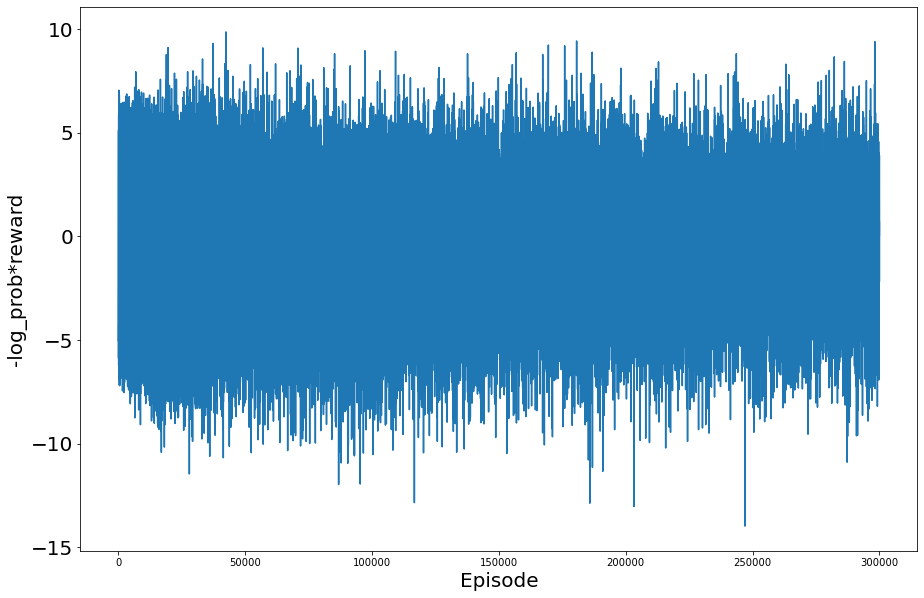

In [20]:
losses = mcts1.get_losses()
fig = plt.figure(figsize=(15,10))

plt.plot(losses)
plt.xlabel('Episode',fontsize=20)
#plt.xticks([0,1000,2000,3000,4000],['0','1000','2000','3000','4000'],fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('-log_prob*reward',fontsize=20)
plt.show()

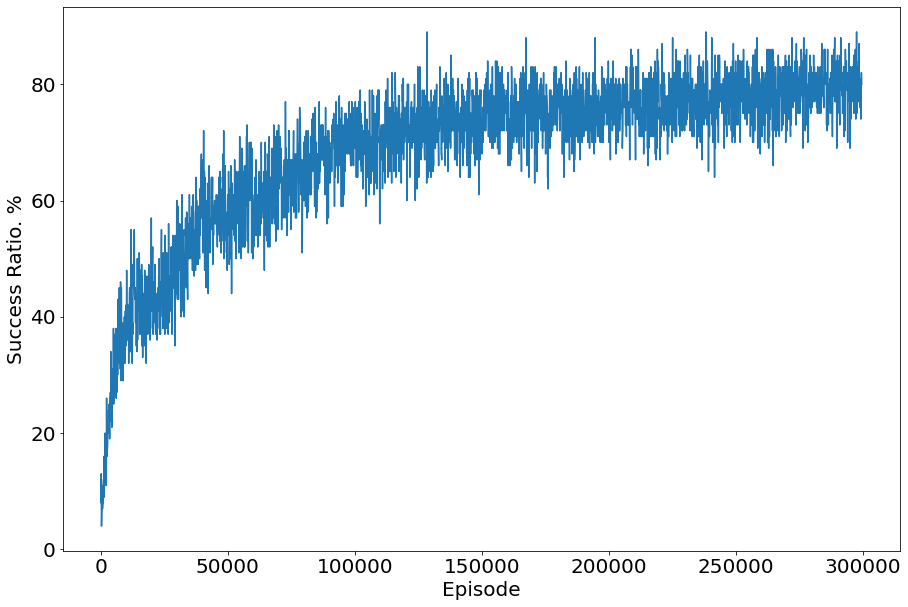

In [22]:
success = mcts1.get_success_ratios()
#success2 = mctsnet2.get_success_ratios()
fig = plt.figure(figsize=(15,10))

plt.plot(success)
plt.xlabel('Episode',fontsize=20)
plt.xticks([0,500,1000,1500,2000,2500,3000],['0','50000','100000', '150000', '200000', '250000', '300000'],fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Success Ratio. %',fontsize=20)
#plt.legend(prop={'size': 20})
plt.show()

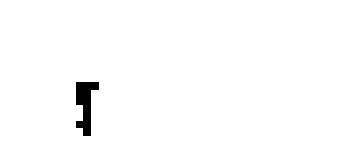

tensor([0.0312, 0.0008, 0.0005, 0.0612, 0.0556, 0.0016, 0.0699, 0.0412, 0.0008,
        0.3610, 0.0572, 0.0007, 0.0269, 0.0320, 0.2536, 0.0009, 0.0012, 0.0019,
        0.0020])


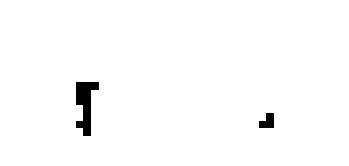

tensor([0.1123, 0.0023, 0.0015, 0.2322, 0.2101, 0.0049, 0.2154, 0.0021, 0.0968,
        0.1161, 0.0027, 0.0036])


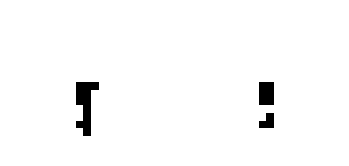

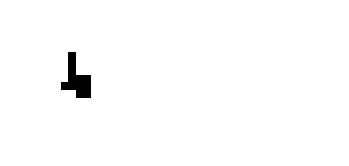

tensor([2.6014e-02, 6.1720e-04, 2.0944e-03, 5.1877e-02, 1.2618e-03, 2.1977e-03,
        6.0962e-04, 3.4619e-02, 6.1643e-04, 5.8353e-01, 1.7848e-03, 4.8333e-02,
        5.6379e-04, 9.5113e-04, 6.0270e-04, 6.3797e-02, 7.8354e-04, 6.6693e-04,
        2.6651e-02, 4.3867e-04, 6.9158e-04, 9.1223e-04, 1.5039e-01])


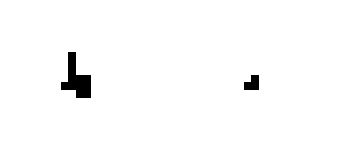

tensor([0.0881, 0.0023, 0.1704, 0.0047, 0.1586, 0.0021, 0.0914, 0.0017, 0.4806])


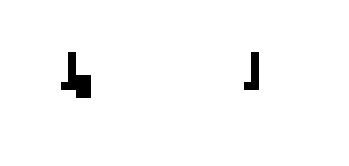

tensor([0.2231, 0.0105, 0.3755, 0.0182, 0.3635, 0.0091])


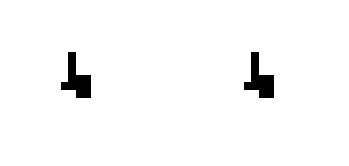

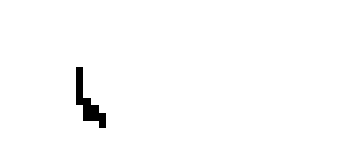

tensor([2.3876e-01, 2.0748e-02, 1.1728e-03, 2.5449e-02, 2.1689e-01, 2.1213e-02,
        1.1702e-01, 5.2594e-04, 2.1481e-01, 2.7650e-02, 1.4401e-02, 1.2253e-02,
        1.2601e-04, 8.8985e-02])


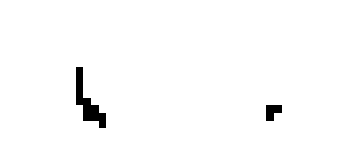

tensor([0.3453, 0.2895, 0.1962, 0.1673, 0.0018])


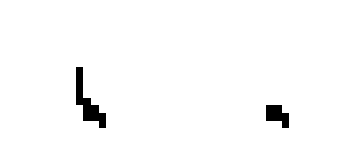

tensor([5.1054e-01, 2.8313e-01, 2.0588e-01, 4.5582e-04])


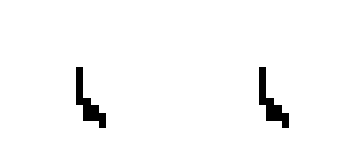

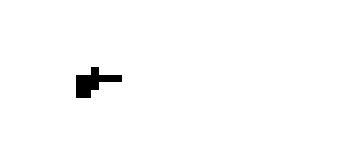

tensor([7.8878e-04, 1.3413e-02, 3.2627e-01, 1.0675e-03, 8.6841e-04, 2.6897e-02,
        3.9540e-04, 1.1188e-03, 6.3558e-04, 5.7247e-04, 3.0627e-01, 9.1015e-04,
        7.2027e-04, 2.8575e-04, 1.5520e-01, 4.8320e-04, 1.1579e-02, 1.8132e-04,
        1.4563e-04, 3.9866e-04, 2.3358e-02, 1.3755e-02, 1.1422e-01, 4.6326e-04])


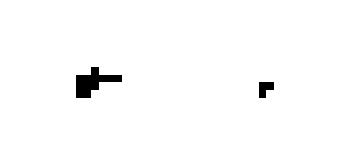

tensor([0.0139, 0.0219, 0.0103, 0.2283, 0.0071, 0.0060, 0.4318, 0.2807])


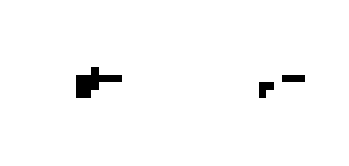

tensor([0.0601, 0.0930, 0.8469])


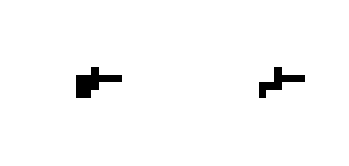

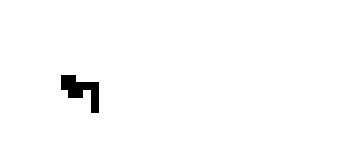

tensor([1.3712e-02, 2.2854e-04, 3.0782e-01, 4.4668e-04, 7.1200e-04, 6.2826e-02,
        1.2303e-03, 1.8058e-02, 2.8547e-01, 2.5113e-02, 3.2231e-04, 1.4795e-01,
        1.1842e-02, 1.6822e-04, 3.2981e-02, 1.4122e-02, 7.6178e-02, 8.2892e-04])


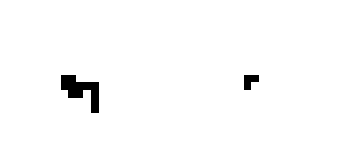

tensor([9.3550e-04, 1.7012e-03, 1.0694e-01, 1.7806e-01, 6.5074e-02, 2.7326e-04,
        6.4486e-01, 2.1639e-03])


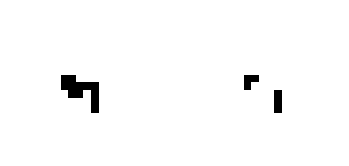

tensor([0.0144, 0.3271, 0.4436, 0.2113, 0.0037])


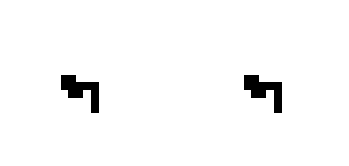

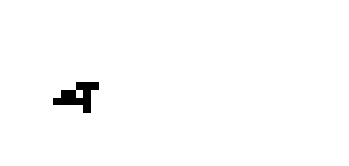

tensor([5.8648e-04, 3.0602e-03, 6.4603e-02, 8.9431e-04, 3.2801e-03, 4.2299e-03,
        3.6884e-01, 1.5864e-03, 3.4879e-01, 2.6172e-03, 2.8852e-02, 7.9367e-02,
        5.6971e-02, 1.5523e-03, 3.4452e-02, 3.1861e-04])


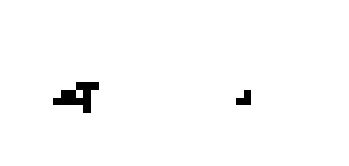

tensor([8.4046e-04, 1.1312e-01, 1.3123e-03, 6.3632e-01, 4.8501e-02, 1.4159e-01,
        5.7870e-02, 4.4286e-04])


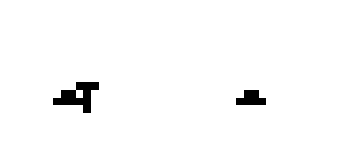

tensor([0.0017, 0.5533, 0.2063, 0.2379, 0.0008])


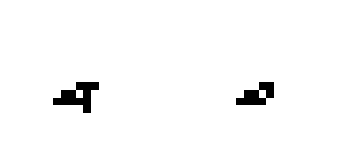

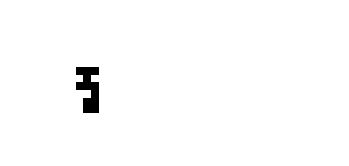

tensor([0.0011, 0.3473, 0.0006, 0.0016, 0.0363, 0.0632, 0.3179, 0.0013, 0.0007,
        0.1690, 0.0144, 0.0283, 0.0005, 0.0172, 0.0007])


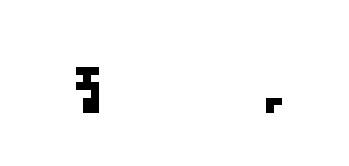

tensor([0.0042, 0.2482, 0.4399, 0.0048, 0.0995, 0.1997, 0.0038])


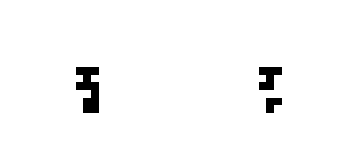

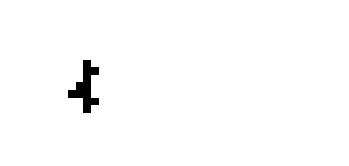

tensor([1.1768e-03, 4.8737e-04, 3.8021e-01, 3.4230e-02, 9.6335e-04, 6.8343e-02,
        2.3451e-02, 4.8587e-04, 4.4252e-04, 7.3537e-04, 3.4517e-01, 2.6449e-03,
        5.5559e-04, 1.3483e-03, 3.4732e-04, 1.3887e-01, 5.3789e-04])


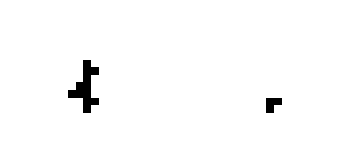

tensor([6.4509e-02, 1.3056e-01, 4.1472e-02, 6.4915e-04, 5.8835e-04, 7.5507e-01,
        3.9626e-03, 7.5310e-04, 1.9678e-03, 4.6410e-04])


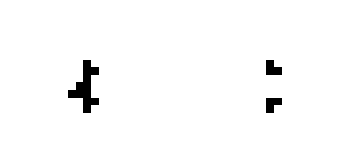

tensor([0.2613, 0.5670, 0.1598, 0.0013, 0.0097, 0.0009])


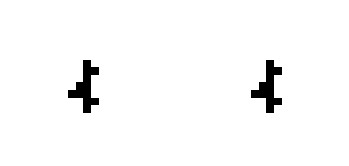

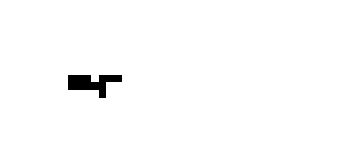

tensor([6.8589e-02, 3.2790e-04, 2.7364e-01, 2.2496e-02, 1.7070e-03, 1.2036e-03,
        4.9476e-02, 1.6696e-02, 1.4433e-01, 1.0008e-01, 4.7202e-04, 2.5700e-01,
        1.0909e-02, 1.9114e-04, 3.0376e-02, 2.1701e-02, 5.6436e-04, 2.3422e-04])


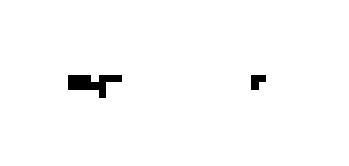

tensor([0.1764, 0.3600, 0.1341, 0.0059, 0.0911, 0.0026, 0.2267, 0.0032])


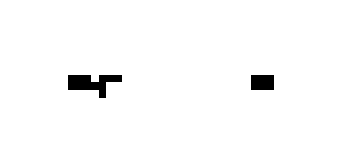

tensor([0.4220, 0.5737, 0.0044])


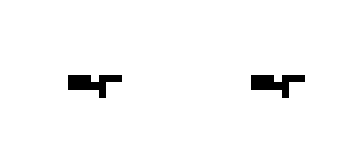

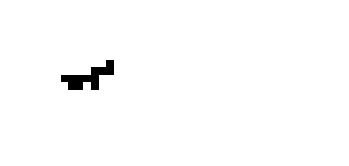

tensor([1.7829e-01, 9.9289e-04, 2.0421e-03, 7.3804e-04, 7.3729e-02, 4.8740e-03,
        1.7487e-03, 6.3721e-01, 1.0527e-03, 3.4651e-03, 5.7875e-04, 5.5539e-04,
        5.7756e-02, 1.6733e-03, 3.5299e-02])


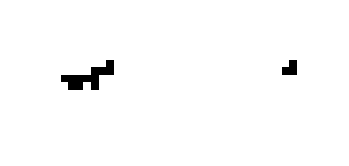

tensor([0.4808, 0.0069, 0.0026, 0.2059, 0.0156, 0.0113, 0.0020, 0.1655, 0.0057,
        0.1038])


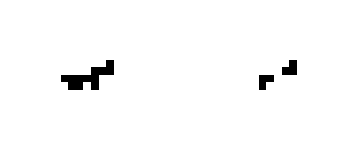

tensor([0.6752, 0.3248])


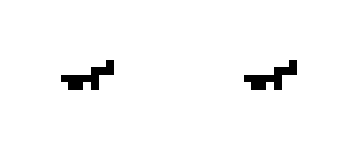

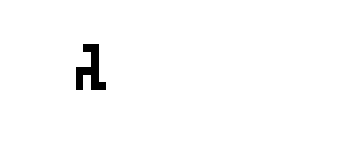

tensor([1.6592e-03, 5.6153e-02, 1.3720e-01, 4.1525e-02, 5.5669e-01, 4.0979e-04,
        3.8801e-02, 3.6617e-04, 7.2349e-04, 1.6423e-01, 2.2458e-03])


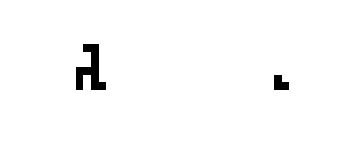

tensor([0.0059, 0.6366, 0.1819, 0.0014, 0.1705, 0.0012, 0.0025])


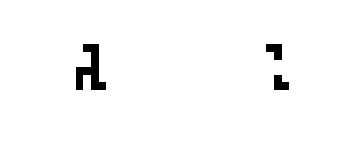

tensor([0.0082, 0.5205, 0.0015, 0.4697])


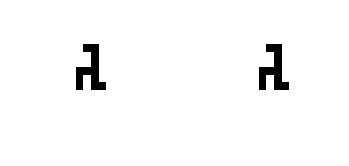

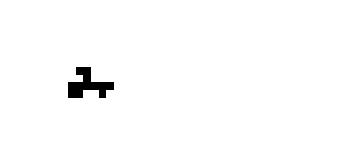

tensor([1.6400e-02, 3.3588e-01, 9.5082e-04, 3.3983e-04, 7.2859e-02, 2.2986e-03,
        6.2721e-02, 1.7833e-01, 6.5311e-04, 3.1364e-01, 1.4179e-02, 2.6714e-04,
        1.8191e-04, 7.7736e-04, 5.2193e-04])


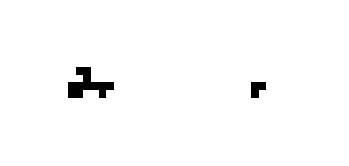

tensor([0.0084, 0.9537, 0.0148, 0.0066, 0.0048, 0.0117])


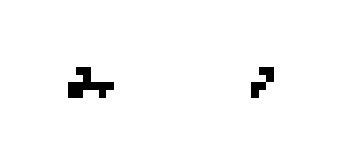

tensor([0.5853, 0.4147])


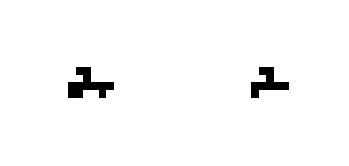

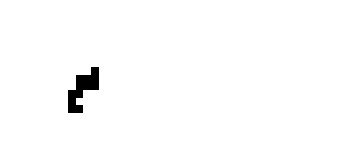

tensor([2.2245e-03, 9.1074e-04, 5.8543e-04, 2.9986e-03, 6.7645e-02, 1.1389e-03,
        1.8183e-03, 1.6315e-03, 4.5876e-02, 7.4261e-04, 2.0343e-03, 7.7390e-04,
        3.7159e-01, 2.9973e-02, 5.0170e-04, 3.1520e-04, 2.7758e-01, 1.9167e-01])


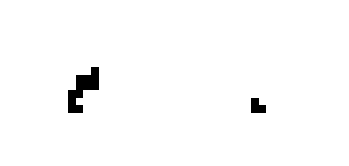

tensor([0.0076, 0.0033, 0.0021, 0.1972, 0.0040, 0.0064, 0.0057, 0.1378, 0.0027,
        0.0910, 0.0019, 0.0012, 0.5391])


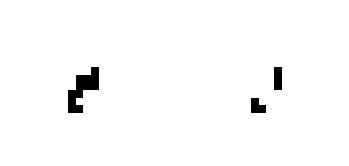

tensor([0.0153, 0.0097, 0.5440, 0.4185, 0.0124])


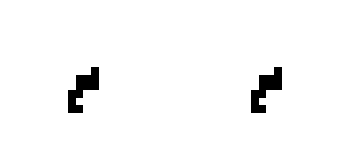

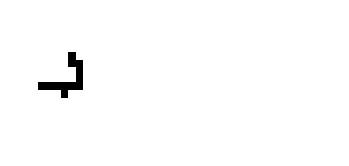

tensor([0.7344, 0.0675, 0.0043, 0.0055, 0.0688, 0.0015, 0.0651, 0.0021, 0.0023,
        0.0472, 0.0014])


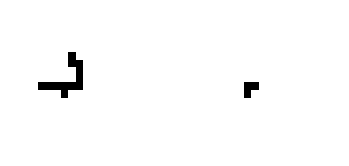

tensor([0.2730, 0.2760, 0.2617, 0.1856, 0.0037])


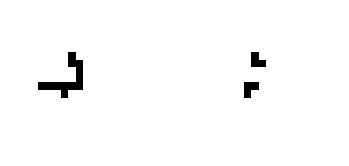

tensor([0.5790, 0.4210])


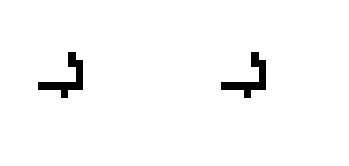

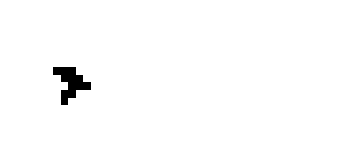

tensor([2.4371e-02, 5.6017e-01, 1.6654e-03, 1.2965e-03, 1.2355e-03, 5.5057e-02,
        3.2410e-03, 2.2712e-03, 3.2033e-02, 1.7442e-03, 6.5490e-04, 1.9600e-01,
        4.4831e-02, 5.5553e-04, 2.2272e-03, 3.4669e-03, 4.2089e-02, 1.1620e-03,
        2.5023e-02, 9.0444e-04])


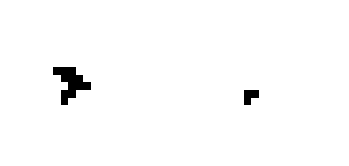

tensor([0.0036, 0.1338, 0.0091, 0.0065, 0.0816, 0.0020, 0.4608, 0.1111, 0.0017,
        0.0065, 0.0098, 0.1053, 0.0035, 0.0646])


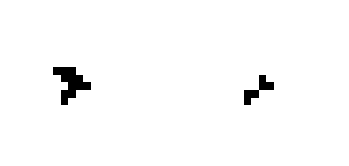

tensor([0.4493, 0.0180, 0.0131, 0.0030, 0.3356, 0.1810])


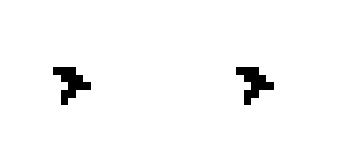

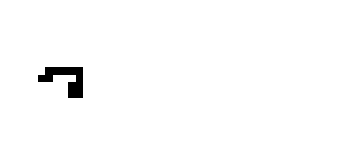

tensor([1.4360e-03, 2.8703e-01, 3.7068e-04, 2.1847e-03, 2.6718e-01, 1.5325e-01,
        7.7825e-04, 2.6546e-01, 2.3586e-03, 2.2148e-04, 4.8781e-04, 1.8162e-02,
        1.0809e-03])


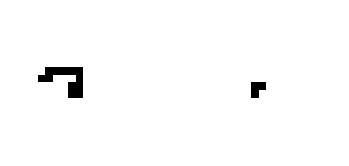

tensor([0.0036, 0.9707, 0.0185, 0.0025, 0.0048])


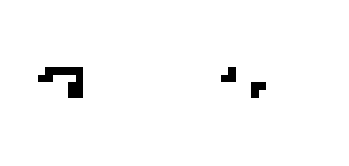

tensor([0.1440, 0.7583, 0.0977])


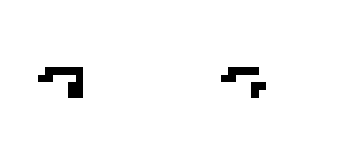

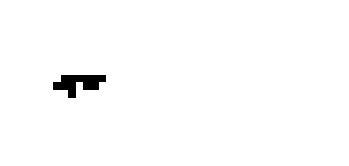

tensor([0.0024, 0.0386, 0.0033, 0.0034, 0.0755, 0.0012, 0.0052, 0.0037, 0.0018,
        0.4433, 0.0018, 0.0022, 0.0029, 0.0333, 0.0006, 0.0011, 0.0662, 0.0019,
        0.3117])


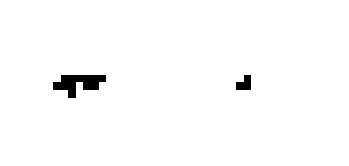

tensor([0.0071, 0.0910, 0.0095, 0.1663, 0.0038, 0.0065, 0.0783, 0.0018, 0.0033,
        0.6324])


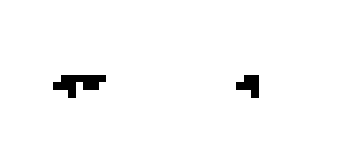

tensor([0.0127, 0.2462, 0.5116, 0.0060, 0.0113, 0.2094, 0.0028])


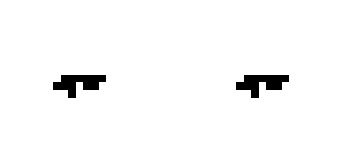

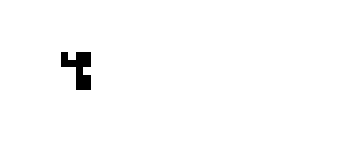

tensor([1.3994e-01, 6.8457e-04, 4.4107e-04, 4.6102e-02, 6.7466e-04, 5.7600e-02,
        1.0101e-01, 5.5968e-04, 3.2288e-03, 2.0383e-01, 4.7364e-02, 5.8203e-04,
        2.7640e-01, 6.2152e-02, 7.3686e-04, 3.1732e-02, 2.6722e-02, 2.3777e-04])


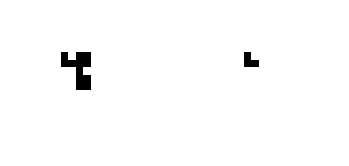

tensor([0.3350, 0.0022, 0.0014, 0.1174, 0.1431, 0.2458, 0.0018, 0.0817, 0.0707,
        0.0008])


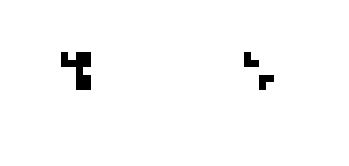

tensor([0.9893, 0.0077, 0.0031])


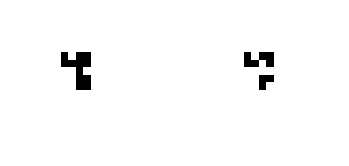

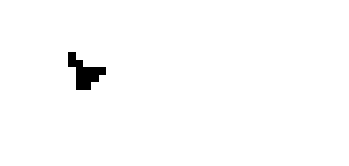

tensor([1.3446e-01, 9.6070e-04, 2.3813e-02, 5.5588e-04, 3.5696e-04, 7.0499e-04,
        4.0956e-04, 1.1363e-01, 5.4737e-02, 9.6573e-02, 1.1308e-03, 5.5520e-04,
        1.9824e-01, 8.0852e-04, 1.2804e-03, 5.0782e-04, 2.7484e-01, 3.2304e-04,
        2.1364e-04, 4.1497e-02, 2.9313e-02, 6.5509e-04, 2.4432e-02])


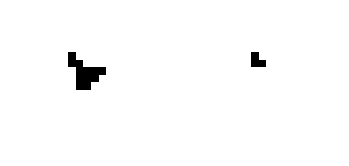

tensor([0.3166, 0.0030, 0.0610, 0.0018, 0.0011, 0.0022, 0.0013, 0.1322, 0.2321,
        0.0035, 0.0018, 0.0010, 0.0007, 0.1037, 0.0744, 0.0635])


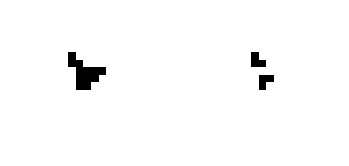

tensor([0.5246, 0.0095, 0.4659])


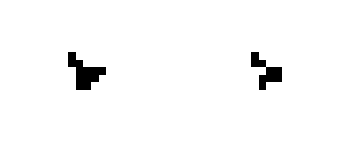

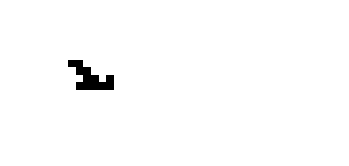

tensor([1.6533e-03, 5.9571e-02, 7.3240e-02, 3.4789e-03, 1.2813e-01, 1.9439e-03,
        6.3256e-01, 1.4069e-03, 2.1477e-03, 6.0989e-02, 3.4465e-03, 2.9345e-02,
        5.7588e-04, 3.9516e-04, 1.1139e-03])


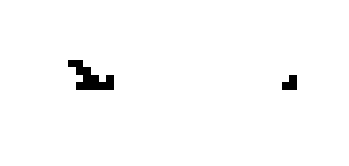

tensor([0.0080, 0.2536, 0.3090, 0.0165, 0.0067, 0.2577, 0.0160, 0.1271, 0.0054])


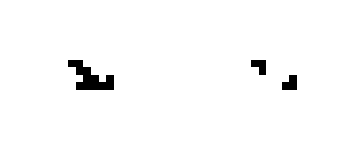

tensor([0.0047, 0.0042, 0.7272, 0.2608, 0.0030])


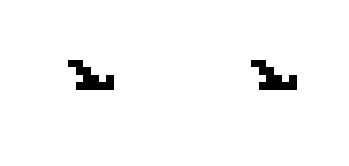

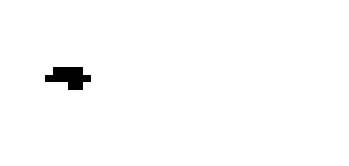

tensor([1.3072e-01, 2.2582e-02, 4.9936e-04, 3.1855e-04, 1.7281e-03, 4.1004e-02,
        1.0359e-03, 4.9353e-04, 5.2506e-02, 2.8049e-03, 3.0253e-02, 4.9896e-04,
        4.0619e-04, 5.4026e-01, 1.4744e-03, 7.3312e-04, 4.2491e-02, 4.5725e-04,
        4.2560e-04, 7.7516e-04, 2.9964e-03, 2.3005e-04, 5.6307e-02, 6.4125e-04,
        5.4141e-04, 3.9524e-02, 2.7936e-02, 3.5346e-04])


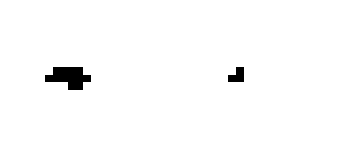

tensor([0.3386, 0.0652, 0.0019, 0.0012, 0.1141, 0.0037, 0.1416, 0.0093, 0.0026,
        0.1161, 0.0017, 0.0016, 0.0098, 0.0009, 0.1110, 0.0795, 0.0013])


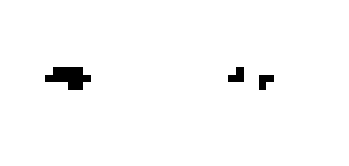

tensor([0.2388, 0.2889, 0.2448, 0.2256, 0.0019])


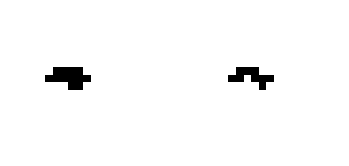

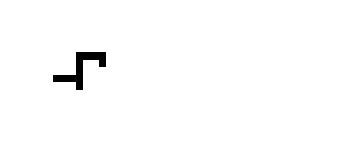

tensor([8.3265e-01, 1.1981e-03, 9.3474e-02, 1.2168e-03, 7.4061e-03, 7.3121e-04,
        1.7744e-03, 1.5879e-03, 5.4441e-02, 1.6348e-03, 3.8815e-03])


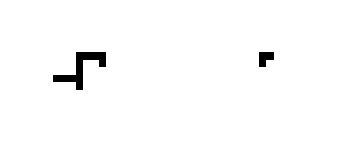

tensor([0.0068, 0.5980, 0.0068, 0.0423, 0.0040, 0.3421])


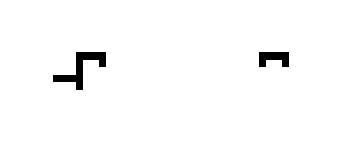

tensor([0.0061, 0.0564, 0.0030, 0.9346])


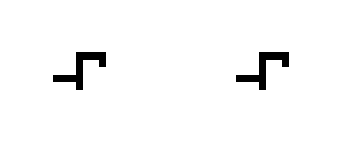

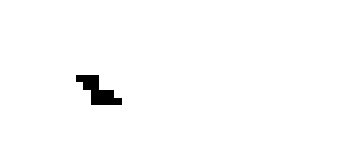

tensor([6.3059e-04, 2.4187e-01, 8.5129e-04, 2.0485e-02, 3.1855e-04, 1.8681e-04,
        1.8547e-02, 2.4978e-04, 4.5973e-04, 2.2564e-01, 7.2530e-04, 5.7585e-04,
        1.9122e-02, 1.1597e-01, 3.8866e-04, 2.2164e-01, 8.9311e-03, 1.4512e-03,
        2.5184e-02, 3.1988e-04, 1.0618e-02, 8.5839e-02])


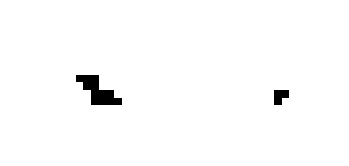

tensor([0.1005, 0.0025, 0.0035, 0.0052, 0.0043, 0.8331, 0.0484, 0.0024])


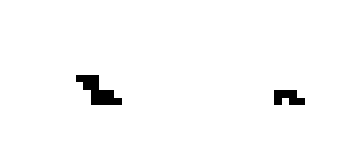

tensor([0.6430, 0.0175, 0.0246, 0.3149])


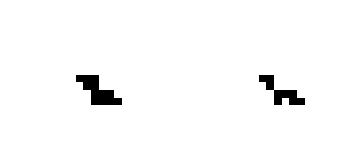

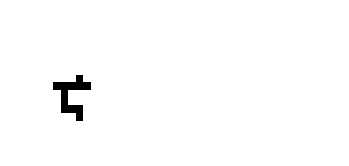

tensor([0.0027, 0.0568, 0.0691, 0.0008, 0.2368, 0.3124, 0.0052, 0.0005, 0.0006,
        0.0754, 0.2387, 0.0011])


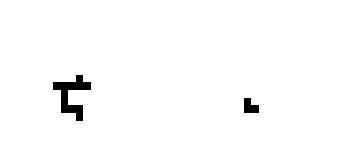

tensor([0.0402, 0.8533, 0.0129, 0.0769, 0.0078, 0.0089])


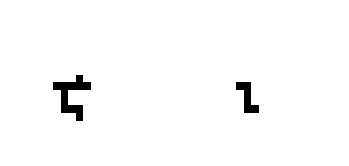

tensor([0.5742, 0.4258])


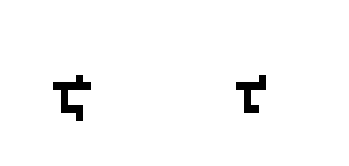

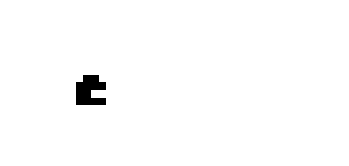

tensor([7.2509e-04, 1.7644e-02, 4.2092e-04, 2.7036e-04, 3.5221e-02, 3.1036e-04,
        8.6113e-04, 7.1068e-02, 8.5355e-04, 2.3401e-02, 4.2028e-04, 6.1079e-04,
        3.2765e-02, 3.8411e-04, 2.0085e-01, 3.8619e-01, 1.5233e-02, 2.4463e-04,
        2.4417e-03, 4.3230e-02, 1.8124e-02, 2.9979e-04, 1.4844e-01])


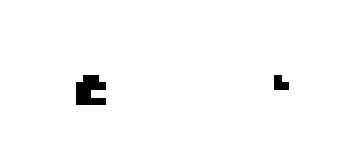

tensor([0.0540, 0.0018, 0.0999, 0.0034, 0.1968, 0.0692, 0.0018, 0.0088, 0.1218,
        0.0564, 0.0013, 0.3849])


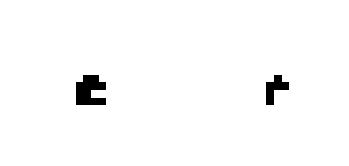

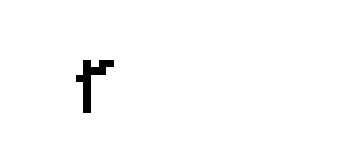

tensor([1.3667e-03, 4.9976e-01, 4.9913e-02, 9.8026e-02, 3.6223e-03, 2.5436e-01,
        6.1330e-02, 9.2400e-04, 2.2127e-03, 2.7588e-02, 3.0047e-04, 5.9305e-04])


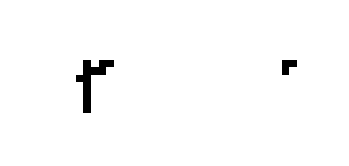

tensor([0.1214, 0.2355, 0.5565, 0.0031, 0.0071, 0.0732, 0.0011, 0.0021])


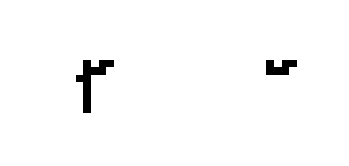

tensor([0.5968, 0.3814, 0.0079, 0.0138])


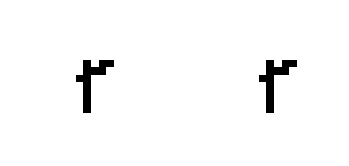

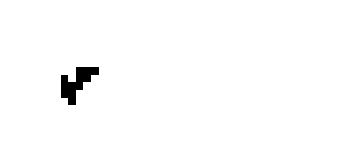

tensor([5.7514e-02, 4.6871e-04, 2.3731e-01, 2.2958e-01, 9.4601e-04, 2.0396e-04,
        1.8903e-02, 2.3683e-02, 5.5171e-04, 2.2495e-04, 1.2121e-01, 3.9604e-04,
        1.9420e-02, 2.1551e-01, 1.0815e-04, 1.5363e-03, 1.2972e-02, 5.8781e-02,
        6.7740e-04])


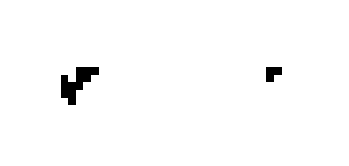

tensor([0.0475, 0.0568, 0.0009, 0.2488, 0.0477, 0.4238, 0.0049, 0.0340, 0.1333,
        0.0023])


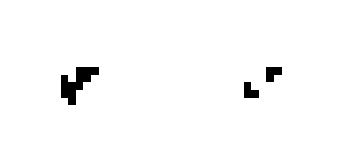

tensor([0.0529, 0.9471])


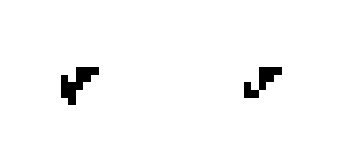

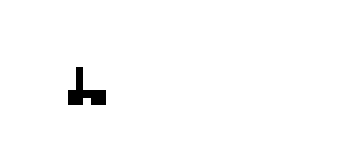

tensor([1.9975e-01, 1.9351e-01, 5.0307e-04, 4.7883e-04, 1.9790e-04, 1.2361e-03,
        1.8453e-01, 1.0223e-01, 4.2057e-04, 1.6545e-02, 9.6432e-02, 1.8131e-01,
        1.3272e-03, 1.1417e-04, 4.1141e-04, 1.1082e-02, 9.3376e-03, 5.8729e-04])


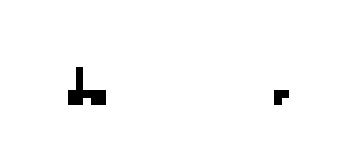

tensor([0.0036, 0.3168, 0.0012, 0.0497, 0.5645, 0.0012, 0.0335, 0.0280, 0.0017])


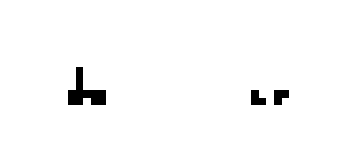

tensor([0.5477, 0.4523])


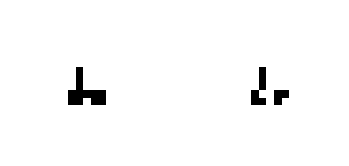

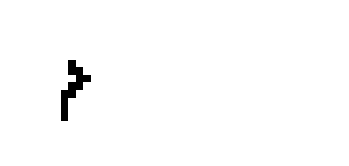

tensor([0.1471, 0.0010, 0.0025, 0.0624, 0.0383, 0.0008, 0.0013, 0.4969, 0.0357,
        0.2130, 0.0010])


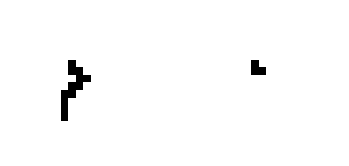

tensor([3.5324e-01, 4.1673e-04, 1.4718e-03, 6.0876e-02, 3.5710e-04, 5.8314e-01,
        5.0514e-04])


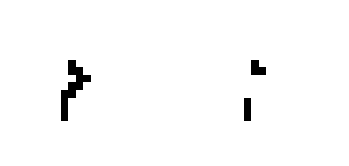

tensor([0.8312, 0.0017, 0.1657, 0.0014])


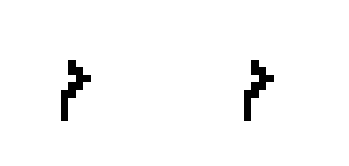

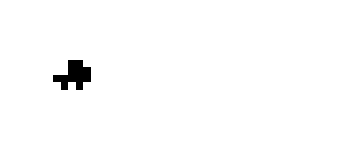

tensor([1.6240e-01, 1.1461e-03, 2.8603e-02, 6.6251e-04, 1.4230e-03, 5.1674e-02,
        1.3626e-03, 5.5015e-04, 1.3691e-01, 6.5813e-02, 1.3474e-03, 3.8102e-02,
        6.6165e-04, 1.1902e-03, 9.6565e-04, 5.3384e-02, 6.0525e-04, 3.3260e-01,
        3.8947e-03, 3.0797e-04, 4.9856e-02, 1.1605e-03, 3.5257e-02, 7.7997e-04,
        2.9337e-02])


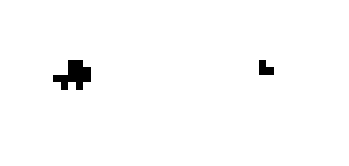

tensor([0.4304, 0.0045, 0.1442, 0.1773, 0.0038, 0.0115, 0.1407, 0.0037, 0.0839])


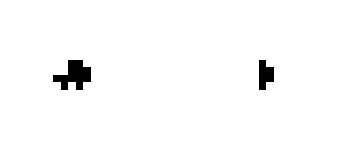

tensor([0.3979, 0.0195, 0.3468, 0.2359])


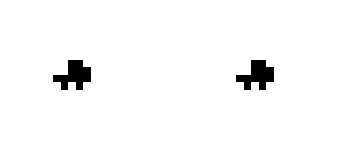

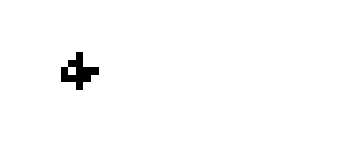

tensor([1.0095e-01, 8.7755e-04, 4.0589e-01, 3.8603e-04, 3.3442e-02, 1.8667e-03,
        1.0338e-03, 2.5039e-02, 5.5415e-04, 7.4572e-04, 1.1472e-03, 3.6936e-01,
        2.0605e-04, 3.2280e-02, 9.8100e-04, 2.3211e-02, 5.9350e-04, 1.4371e-03])


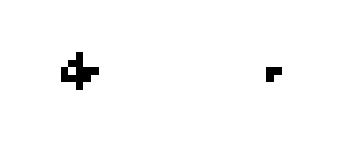

tensor([0.0645, 0.0032, 0.0463, 0.0009, 0.7762, 0.0620, 0.0437, 0.0009, 0.0024])


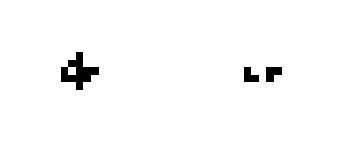

tensor([0.3847, 0.3035, 0.2759, 0.0110, 0.0250])


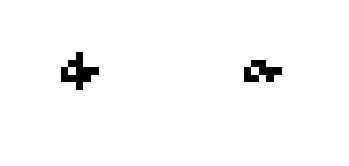

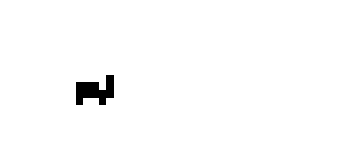

tensor([3.8460e-04, 5.1287e-01, 2.0676e-03, 1.2621e-03, 4.5829e-02, 7.4998e-04,
        4.1716e-02, 5.9772e-04, 1.0565e-03, 6.3993e-04, 4.2936e-02, 1.7576e-03,
        2.1808e-03, 2.0187e-02, 3.3603e-03, 1.0317e-03, 1.1423e-03, 1.8958e-01,
        1.3065e-01])


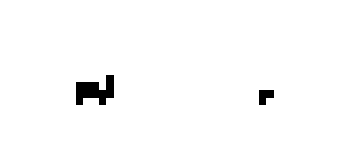

tensor([0.0028, 0.1442, 0.0023, 0.1457, 0.0693, 0.0119, 0.6237])


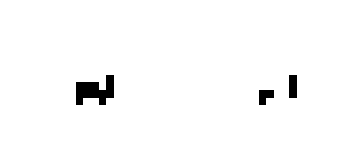

tensor([0.0084, 0.3951, 0.4038, 0.1927])


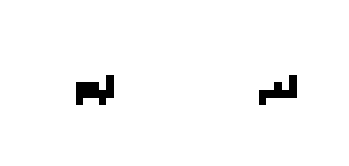

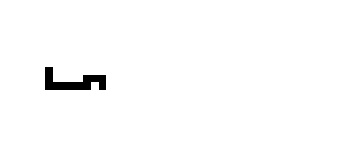

tensor([1.7610e-03, 1.3337e-01, 1.1611e-01, 5.2824e-01, 4.4209e-04, 5.3373e-03,
        5.3035e-04, 6.1244e-04, 5.3563e-02, 1.6003e-01])


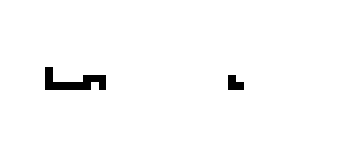

tensor([0.0064, 0.5312, 0.4566, 0.0016, 0.0019, 0.0022])


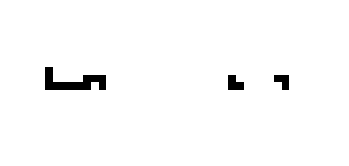

tensor([0.9909, 0.0042, 0.0048])


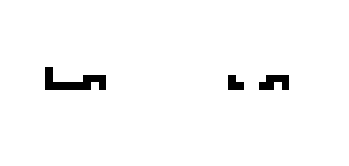

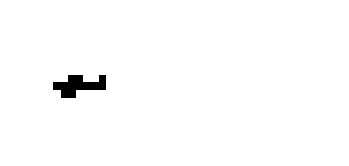

tensor([2.7532e-02, 7.0445e-04, 1.4880e-03, 5.8271e-04, 6.1675e-02, 3.6940e-03,
        7.0296e-04, 5.7759e-01, 1.2430e-03, 7.5338e-04, 2.1946e-01, 6.4136e-04,
        2.5602e-03, 2.3787e-02, 2.7548e-04, 3.3343e-04, 4.7410e-02, 1.2148e-03,
        2.8352e-02])


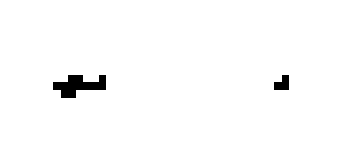

tensor([0.0754, 0.0025, 0.0050, 0.0020, 0.1563, 0.0116, 0.5267, 0.0022, 0.0084,
        0.0012, 0.1259, 0.0042, 0.0785])


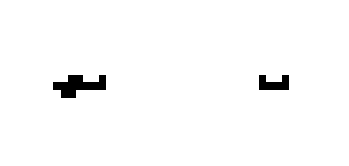

tensor([0.0183, 0.3928, 0.0376, 0.3330, 0.2183])


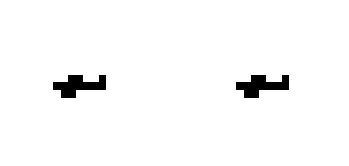

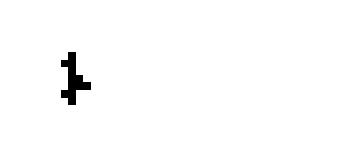

tensor([1.9623e-02, 1.7963e-03, 1.0588e-03, 8.8060e-02, 4.3186e-02, 2.5861e-02,
        3.8912e-01, 2.1710e-01, 1.5184e-01, 3.5630e-02, 4.8494e-04, 2.9129e-03,
        2.0238e-02, 1.8678e-04, 3.8116e-04, 1.2300e-03, 1.2986e-03])


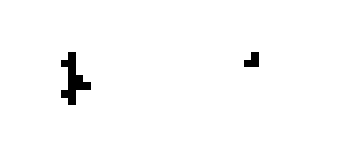

tensor([0.0764, 0.0081, 0.0051, 0.1555, 0.5179, 0.1302, 0.0024, 0.0129, 0.0795,
        0.0057, 0.0062])


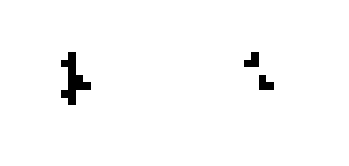

tensor([0.6351, 0.3190, 0.0223, 0.0237])


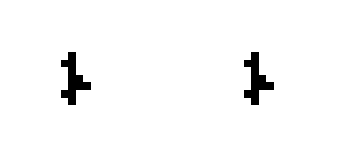

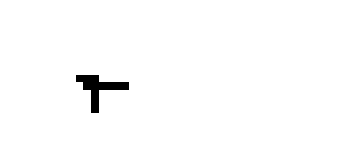

tensor([0.0047, 0.0052, 0.1319, 0.0025, 0.0015, 0.0035, 0.0043, 0.1230, 0.0594,
        0.0008, 0.0105, 0.0011, 0.1176, 0.5290, 0.0022, 0.0029])


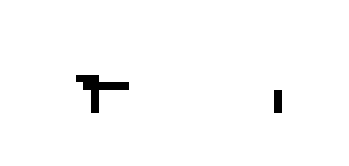

tensor([0.0078, 0.2962, 0.0038, 0.0057, 0.0071, 0.2777, 0.1238, 0.0011, 0.0183,
        0.0016, 0.2568])


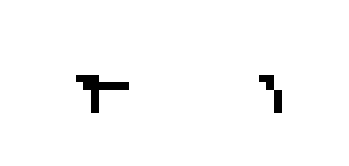

tensor([0.5000, 0.0417, 0.0048, 0.4534])


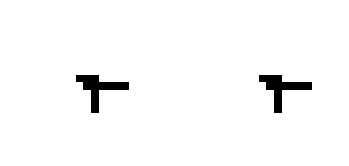

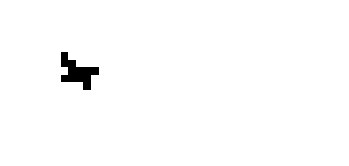

tensor([1.0700e-01, 8.4438e-04, 4.9409e-04, 3.8442e-02, 4.0923e-04, 9.0164e-02,
        4.3882e-02, 7.7081e-02, 2.5809e-02, 4.9328e-04, 1.5647e-01, 4.5042e-04,
        4.2079e-04, 4.0594e-01, 2.7915e-03, 2.3371e-04, 2.7130e-04, 4.7218e-02,
        1.4074e-03, 1.6968e-04])


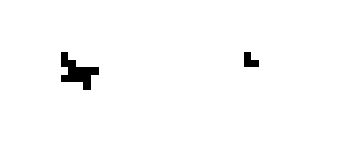

tensor([0.2685, 0.0026, 0.0016, 0.0988, 0.0013, 0.2260, 0.1953, 0.0686, 0.0016,
        0.0082, 0.0008, 0.0009, 0.1216, 0.0043])


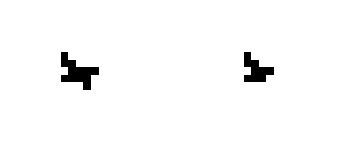

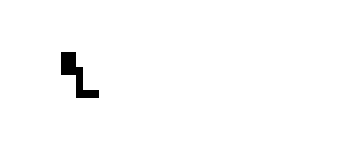

tensor([0.1797, 0.1736, 0.0007, 0.0181, 0.0011, 0.1660, 0.0918, 0.0149, 0.0866,
        0.0003, 0.1628, 0.0012, 0.0195, 0.0100, 0.0084, 0.0650, 0.0002])


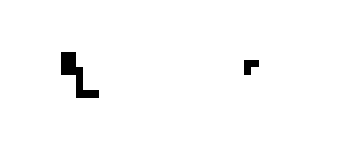

tensor([0.0361, 0.3766, 0.0501, 0.2843, 0.2529])


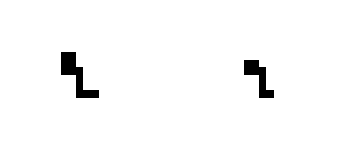

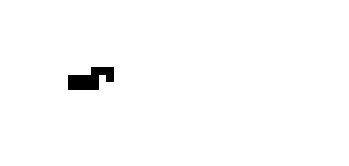

tensor([6.7440e-02, 5.2147e-04, 3.0408e-04, 2.7398e-01, 2.2504e-04, 5.7073e-02,
        1.6235e-03, 1.1348e-03, 4.8673e-02, 6.1432e-04, 5.5177e-04, 1.4421e-01,
        9.9004e-02, 4.3868e-04, 2.5851e-01, 1.0587e-02, 1.6646e-04, 2.1216e-02,
        5.2805e-04, 5.8128e-04, 1.2616e-02])


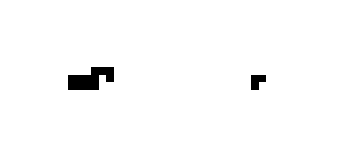

tensor([0.0026, 0.4199, 0.3647, 0.0066, 0.0059, 0.0047, 0.0878, 0.0019, 0.1059])


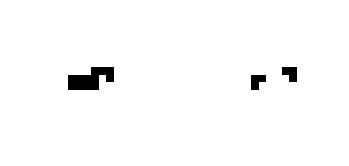

tensor([0.6580, 0.0088, 0.0079, 0.0065, 0.1460, 0.1727])


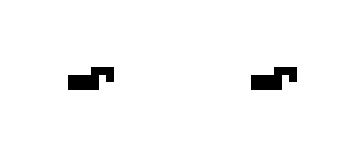

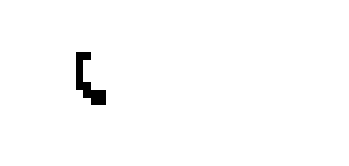

tensor([0.0132, 0.2554, 0.0250, 0.0571, 0.0004, 0.1364, 0.0976, 0.1295, 0.2369,
        0.0308, 0.0160, 0.0004, 0.0011])


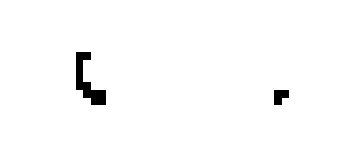

tensor([0.1523, 0.7573, 0.0864, 0.0010, 0.0030])


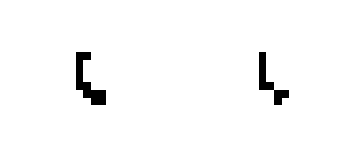

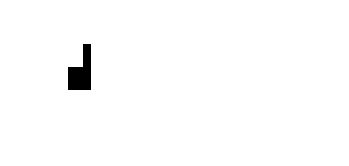

tensor([0.1481, 0.0260, 0.0006, 0.0004, 0.0012, 0.0005, 0.1253, 0.0022, 0.1064,
        0.0345, 0.0006, 0.0005, 0.0018, 0.2189, 0.0486, 0.0005, 0.0005, 0.0035,
        0.0003, 0.0643, 0.0321, 0.0007, 0.0018, 0.0268, 0.0009, 0.1530])


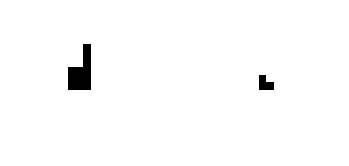

tensor([0.0048, 0.0147, 0.0117, 0.2630, 0.0118, 0.1270, 0.0067, 0.5602])


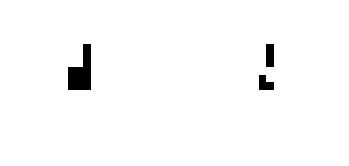

tensor([0.0130, 0.0424, 0.9446])


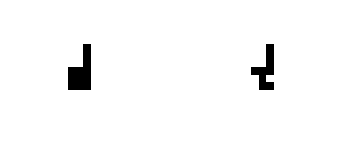

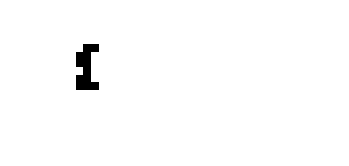

tensor([5.3745e-02, 2.1971e-01, 2.1280e-01, 1.7718e-02, 4.5278e-02, 9.1064e-04,
        3.8791e-02, 1.3160e-02, 2.0285e-01, 7.3927e-04, 7.8271e-02, 3.7904e-04,
        1.0606e-01, 8.6122e-03, 3.0372e-04, 9.1718e-05, 1.8863e-04, 3.8677e-04])


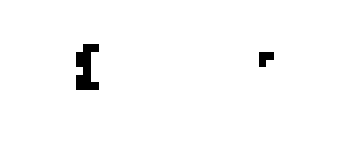

tensor([0.1223, 0.2492, 0.0929, 0.4636, 0.0042, 0.0632, 0.0033, 0.0012])


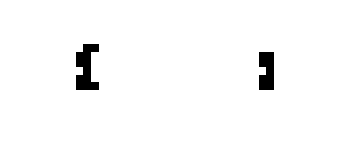

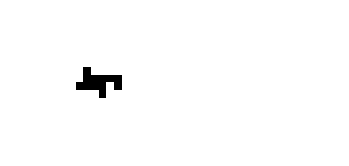

tensor([1.2134e-03, 1.7508e-03, 7.1039e-04, 5.2583e-04, 1.2932e-01, 6.2874e-02,
        2.6291e-03, 1.1048e-01, 1.4292e-03, 1.2839e-03, 1.0252e-03, 1.6015e-03,
        5.8094e-01, 2.4175e-02, 4.1402e-04, 3.9033e-04, 4.8246e-02, 1.3558e-03,
        8.2404e-04, 2.8804e-02])


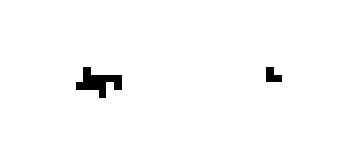

tensor([0.0041, 0.0030, 0.6942, 0.0072, 0.1297, 0.0024, 0.0022, 0.1571])


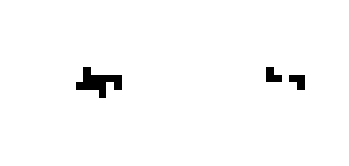

tensor([0.0309, 0.4349, 0.0107, 0.5235])


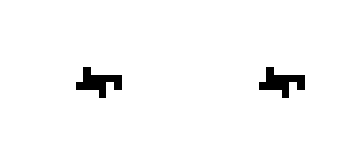

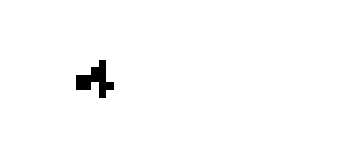

tensor([1.0020e-01, 1.1892e-03, 4.8611e-04, 3.9763e-01, 6.0496e-04, 9.6895e-04,
        3.9839e-04, 7.2054e-02, 2.4515e-02, 4.8496e-04, 3.9628e-04, 1.4545e-01,
        4.4249e-04, 1.4105e-03, 2.8209e-04, 2.6897e-03, 1.4764e-01, 1.0203e-01,
        1.1275e-03])


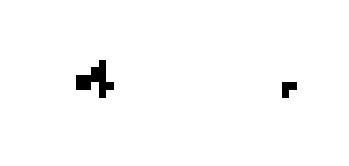

tensor([0.0020, 0.0013, 0.1857, 0.0659, 0.0016, 0.0013, 0.3642, 0.0015, 0.0009,
        0.0082, 0.3674])


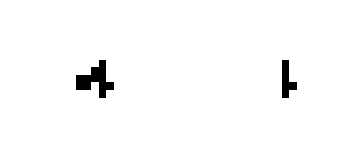

tensor([0.0029, 0.2958, 0.1069, 0.5929, 0.0014])


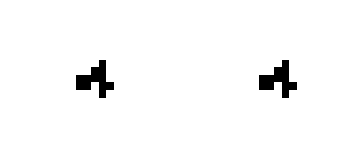

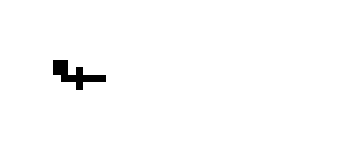

tensor([8.0183e-02, 3.1751e-01, 3.3098e-04, 3.3393e-02, 2.0582e-03, 3.2527e-04,
        1.6816e-01, 5.6718e-04, 2.7303e-02, 2.9795e-01, 2.3331e-04, 2.2011e-03,
        2.1966e-04, 3.5812e-02, 1.8260e-02, 1.5498e-02])


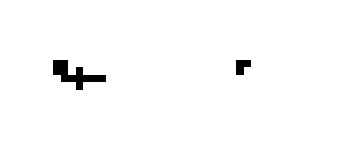

tensor([0.0038, 0.0038, 0.0066, 0.3158, 0.0028, 0.0249, 0.0026, 0.4210, 0.2188])


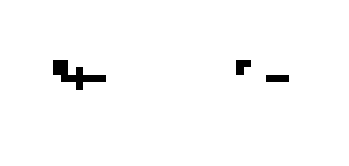

tensor([0.0088, 0.0093, 0.5824, 0.3996])


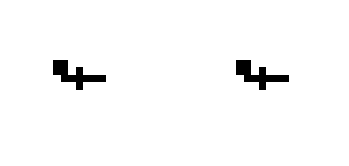

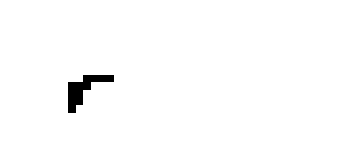

tensor([5.1865e-04, 2.4690e-01, 8.2280e-04, 2.4037e-01, 1.0352e-03, 5.1189e-02,
        1.0506e-03, 4.4021e-02, 2.2697e-01, 5.3530e-04, 1.1991e-01, 8.8180e-04,
        1.2059e-04, 1.6774e-03, 3.7954e-04, 6.2171e-02, 7.0618e-04, 7.4799e-04])


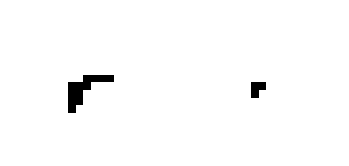

tensor([0.2565, 0.0702, 0.6732])


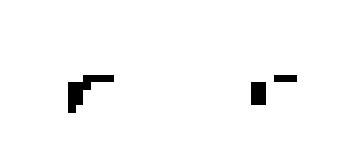

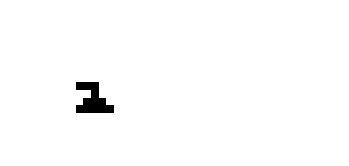

tensor([3.1669e-02, 2.7164e-03, 9.7923e-04, 1.5728e-03, 2.8952e-03, 4.1698e-02,
        3.7758e-01, 1.3727e-03, 8.2791e-04, 5.8529e-02, 7.0180e-04, 3.5474e-01,
        2.3109e-03, 2.7314e-02, 4.4342e-03, 5.5007e-02, 1.3426e-03, 1.4737e-03,
        3.2576e-02, 2.6224e-04])


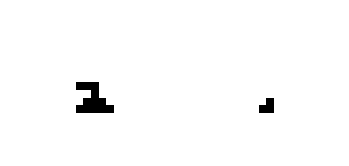

tensor([0.0728, 0.0031, 0.0048, 0.1253, 0.0023, 0.6401, 0.0626, 0.0124, 0.0755,
        0.0010])


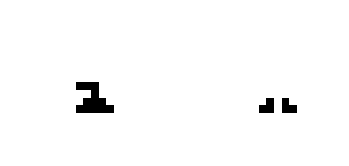

tensor([0.0184, 0.4501, 0.5260, 0.0056])


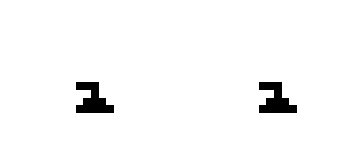

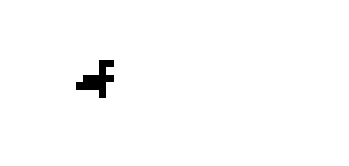

tensor([4.6152e-04, 2.5346e-01, 9.0346e-04, 2.4602e-01, 1.9877e-04, 1.9539e-02,
        5.0865e-02, 4.3431e-02, 5.4291e-04, 1.4487e-02, 2.3596e-01, 3.9038e-04,
        2.4570e-04, 1.2151e-01, 9.4106e-03, 1.5630e-04, 1.0442e-04, 1.5365e-03,
        9.1647e-05, 3.0056e-04, 3.9638e-04])


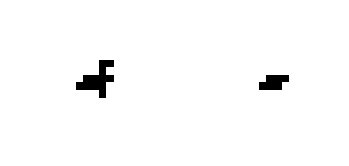

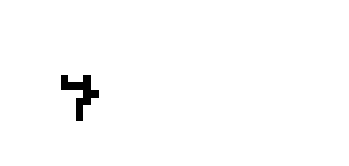

tensor([2.9172e-02, 2.8501e-03, 5.4706e-02, 1.0745e-01, 3.9824e-03, 8.2113e-04,
        5.0633e-01, 4.8906e-02, 1.6715e-03, 3.0252e-02, 3.3063e-04, 2.1352e-01])


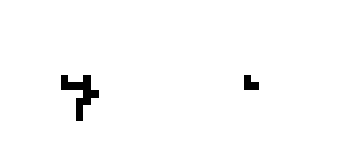

tensor([5.1381e-02, 3.2128e-03, 1.1358e-01, 2.3685e-01, 4.7044e-03, 5.2578e-02,
        2.4598e-04, 5.3745e-01])


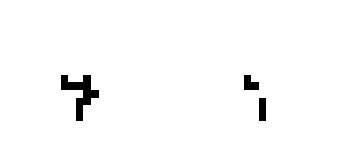

tensor([0.1623, 0.2843, 0.5534])


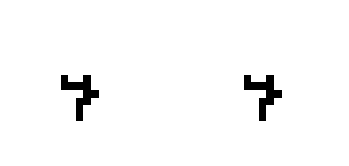

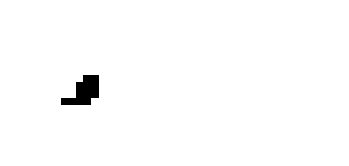

tensor([1.6420e-03, 4.1577e-02, 9.4723e-04, 6.0512e-04, 2.0376e-03, 8.3693e-02,
        1.1949e-03, 6.9570e-04, 7.5254e-02, 1.7011e-01, 1.9291e-03, 5.5598e-02,
        9.4638e-04, 1.7066e-03, 1.0184e-03, 1.3862e-03, 7.7868e-02, 8.6653e-04,
        3.5931e-03, 3.5864e-02, 5.6070e-03, 7.2491e-02, 1.6622e-03, 3.1461e-04,
        6.7136e-04, 3.5832e-01, 2.4027e-03])


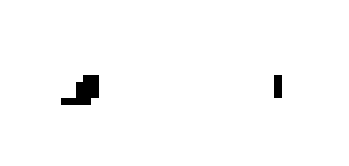

tensor([0.0752, 0.0048, 0.1400, 0.1301, 0.2755, 0.0976, 0.0040, 0.0025, 0.1323,
        0.0081, 0.1259, 0.0040])


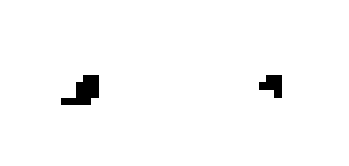

tensor([0.0117, 0.4937, 0.0205, 0.4647, 0.0093])


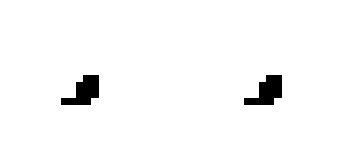

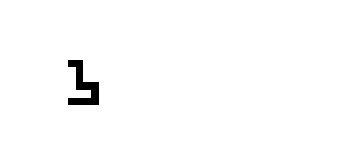

tensor([0.0016, 0.2568, 0.0022, 0.4359, 0.0541, 0.1035, 0.0035, 0.0752, 0.0023,
        0.0649])


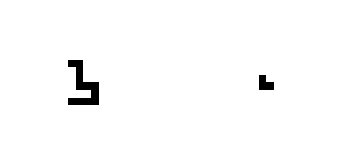

tensor([0.5977, 0.0050, 0.2401, 0.0079, 0.1493])


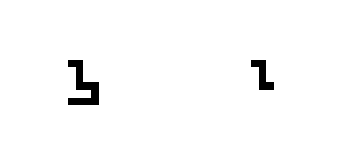

tensor([0.0193, 0.5707, 0.0290, 0.3810])


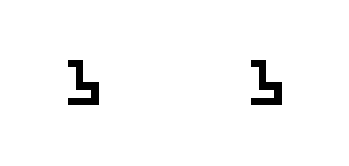

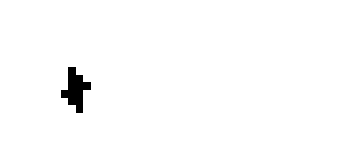

tensor([8.4467e-03, 6.4207e-04, 5.1508e-04, 2.0949e-01, 1.5433e-02, 3.8263e-04,
        4.1658e-02, 6.6514e-04, 2.0050e-02, 1.1115e-02, 2.0918e-01, 5.4928e-04,
        1.0942e-01, 7.2898e-02, 1.5969e-02, 1.6618e-04, 2.8634e-04, 2.0007e-01,
        1.1115e-03, 2.1166e-02, 8.6637e-03, 2.0809e-04, 2.7559e-04, 5.0723e-02,
        4.4927e-04, 4.6586e-04])


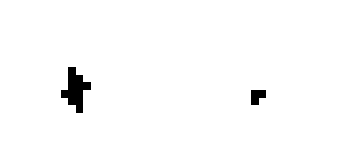

tensor([0.0081, 0.1223, 0.5853, 0.1577, 0.0040, 0.0190, 0.1034])


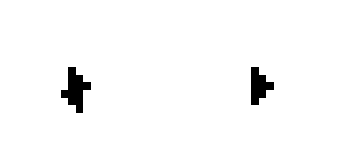

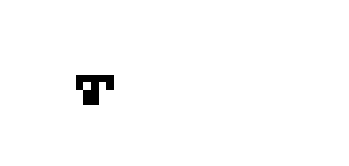

tensor([8.9861e-02, 5.0175e-04, 3.5405e-01, 3.7333e-04, 1.6829e-03, 3.7344e-02,
        3.2254e-01, 1.3631e-03, 1.7292e-01, 2.9352e-04, 2.0119e-04, 2.8080e-04,
        1.7861e-02, 7.2668e-04])


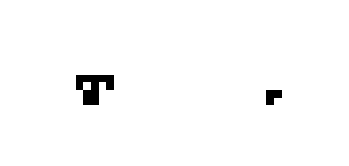

tensor([0.0077, 0.9766, 0.0061, 0.0040, 0.0056])


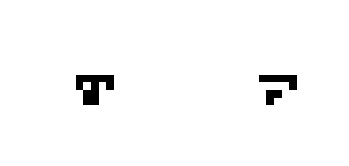

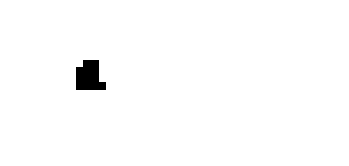

tensor([8.8937e-02, 5.5298e-04, 8.1367e-04, 1.5124e-02, 1.1167e-03, 4.0609e-04,
        2.3088e-04, 7.5573e-02, 1.1633e-03, 3.1560e-04, 6.3622e-02, 6.5148e-04,
        5.8849e-04, 2.0121e-02, 3.8489e-01, 9.5508e-04, 1.3300e-01, 4.6175e-04,
        7.4764e-04, 2.8766e-02, 2.8830e-04, 4.9551e-04, 1.3054e-02, 1.8267e-04,
        1.9496e-03, 3.8238e-02, 1.8707e-02, 9.5449e-04, 1.5473e-02, 1.0247e-04,
        9.2523e-02])


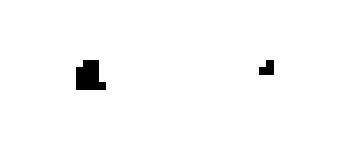

tensor([0.2360, 0.0482, 0.0019, 0.0012, 0.3381, 0.0835, 0.0014, 0.0413, 0.0009,
        0.0079, 0.0006, 0.2391])


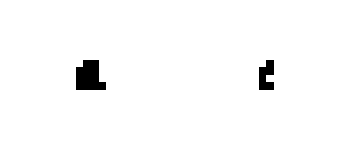

tensor([0.0139, 0.0081, 0.9780])


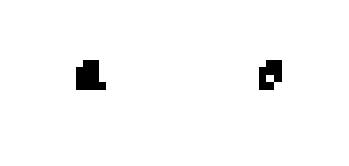

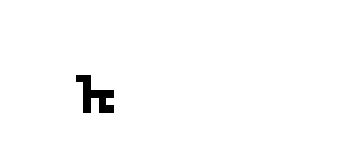

tensor([1.0036e-03, 3.1546e-03, 5.8713e-02, 1.3279e-01, 8.5034e-04, 5.3717e-01,
        5.6961e-04, 7.2326e-02, 3.2667e-02, 3.6723e-04, 7.2055e-04, 1.5967e-01])


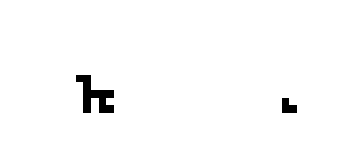

tensor([0.0029, 0.3606, 0.0015, 0.4593, 0.1725, 0.0009, 0.0021])


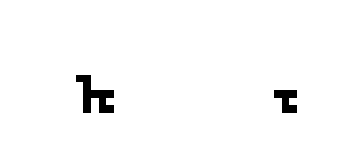

tensor([0.6285, 0.3587, 0.0044, 0.0085])


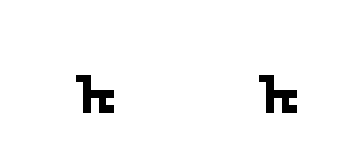

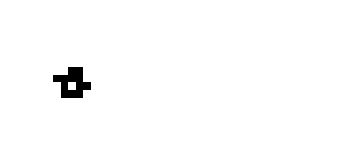

tensor([0.0202, 0.0014, 0.0011, 0.0359, 0.0011, 0.0917, 0.0267, 0.0015, 0.0009,
        0.1583, 0.0369, 0.4035, 0.0483, 0.0007, 0.0346, 0.0247, 0.1111, 0.0013])


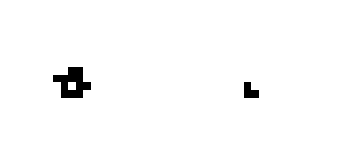

tensor([0.1227, 0.0061, 0.2248, 0.0059, 0.1620, 0.0082, 0.3069, 0.0036, 0.1529,
        0.0071])


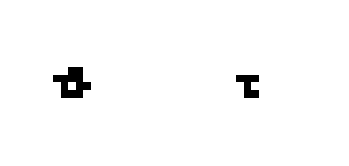

tensor([0.0467, 0.0432, 0.8557, 0.0544])


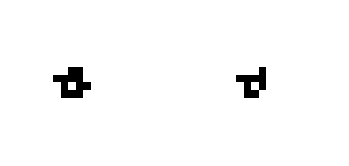

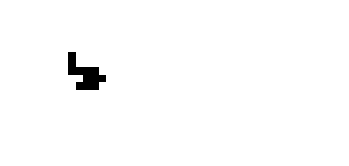

tensor([8.8846e-04, 1.2801e-03, 3.3555e-04, 3.6319e-02, 1.0487e-03, 4.3128e-04,
        8.0028e-02, 1.0465e-03, 4.2572e-04, 7.5077e-04, 4.4324e-04, 2.2111e-01,
        4.1885e-01, 1.7577e-02, 2.9288e-03, 2.8653e-04, 4.9109e-02, 6.0340e-04,
        1.4789e-03, 1.6505e-01])


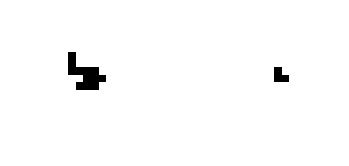

tensor([0.1067, 0.2288, 0.0510, 0.1434, 0.0018, 0.4683])


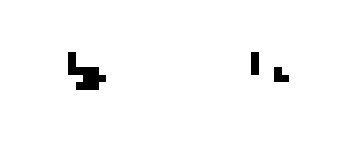

tensor([0.2946, 0.5489, 0.1565])


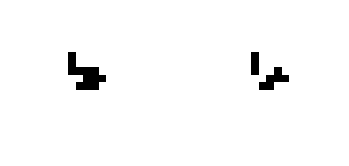

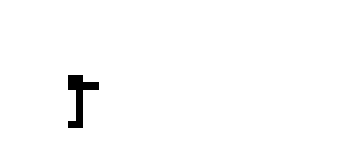

tensor([2.1935e-04, 2.4440e-01, 2.6395e-02, 1.7013e-03, 2.3267e-01, 1.3000e-01,
        9.1788e-02, 2.2816e-01, 1.0417e-02, 2.0551e-02, 1.2468e-02, 1.2011e-04,
        2.4321e-04, 3.7624e-04, 4.9522e-04])


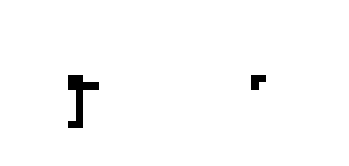

tensor([9.2475e-01, 3.2883e-02, 3.9871e-02, 2.7093e-04, 9.2709e-04, 1.2988e-03])


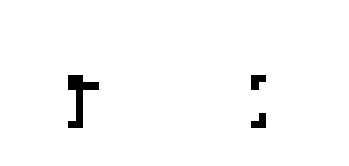

tensor([0.4533, 0.5390, 0.0077])


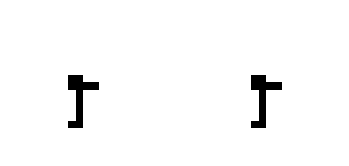

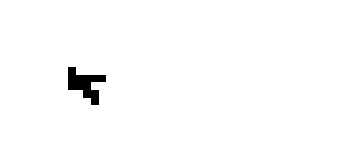

tensor([0.1083, 0.0012, 0.0199, 0.0392, 0.0006, 0.0010, 0.0919, 0.0783, 0.0261,
        0.1591, 0.0365, 0.0005, 0.2173, 0.0003, 0.0028, 0.0002, 0.0343, 0.0204,
        0.1623])


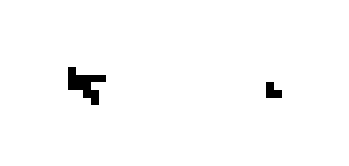

tensor([0.4708, 0.1048, 0.0078, 0.1322, 0.0026, 0.0022, 0.1700, 0.1096])


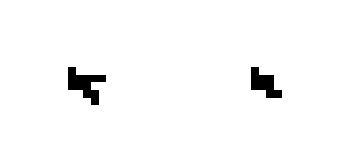

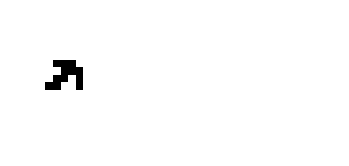

tensor([0.0467, 0.0013, 0.0043, 0.0011, 0.2088, 0.0044, 0.0013, 0.5124, 0.0014,
        0.0012, 0.0011, 0.0006, 0.1107, 0.0568, 0.0481])


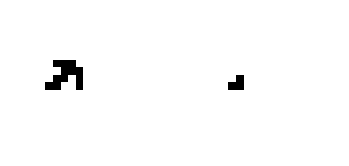

tensor([6.9415e-02, 5.0770e-04, 4.6162e-04, 5.2091e-01, 2.5579e-03, 4.8592e-04,
        4.4899e-04, 2.0432e-04, 2.4155e-01, 9.4188e-02, 6.9267e-02])


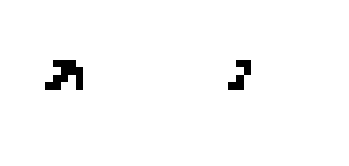

tensor([0.0374, 0.9626])


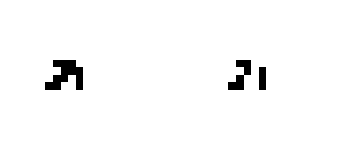

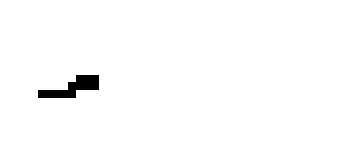

tensor([1.2838e-01, 1.6315e-03, 2.1867e-03, 8.4264e-04, 4.2875e-02, 9.3496e-02,
        1.2040e-03, 4.7217e-01, 3.1268e-03, 1.8652e-01, 1.4871e-03, 2.0968e-02,
        3.9845e-04, 7.2558e-04, 4.1563e-02, 1.1564e-03, 1.2697e-03])


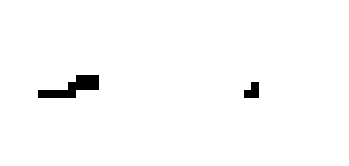

tensor([3.0342e-01, 2.1887e-03, 1.0239e-03, 9.1768e-02, 4.7076e-01, 1.9443e-03,
        4.0238e-02, 4.6103e-04, 8.8203e-02])


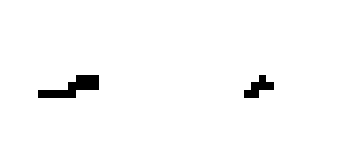

tensor([0.5207, 0.4793])


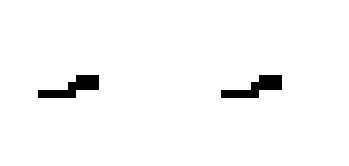

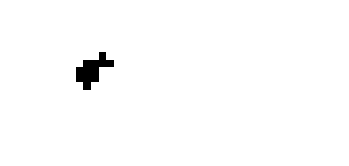

tensor([1.0096e-01, 6.9827e-04, 1.0199e-03, 4.0225e-04, 1.3872e-03, 3.5763e-02,
        3.2045e-02, 8.3273e-04, 3.3629e-04, 7.2476e-02, 8.2262e-04, 2.3552e-02,
        4.0174e-04, 2.0246e-03, 1.4941e-01, 5.8684e-04, 3.6810e-04, 4.0403e-01,
        1.5282e-02, 2.3922e-03, 2.1735e-04, 4.3542e-04, 4.7662e-04, 1.1847e-03,
        1.5289e-01])


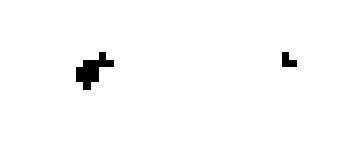

tensor([0.2250, 0.0021, 0.0031, 0.0013, 0.0829, 0.0762, 0.0025, 0.0010, 0.1653,
        0.0025, 0.0567, 0.0013, 0.0376, 0.0067, 0.0015, 0.0035, 0.3307])


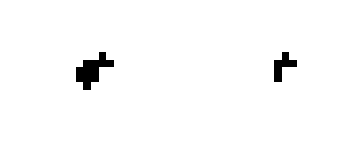

tensor([0.3729, 0.1343, 0.1289, 0.2678, 0.0961])


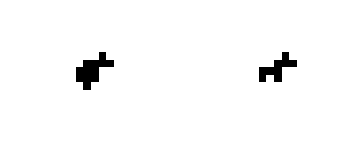

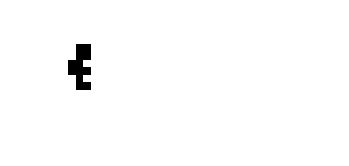

tensor([1.0036e-03, 2.3002e-02, 1.9555e-03, 1.6002e-03, 4.0972e-02, 1.0574e-01,
        5.1444e-02, 3.0389e-02, 4.8158e-01, 2.8121e-03, 1.8323e-01, 4.2154e-02,
        5.3621e-04, 5.7224e-04, 3.3082e-03, 2.8155e-02, 6.8119e-04, 2.0265e-04,
        6.5637e-04])


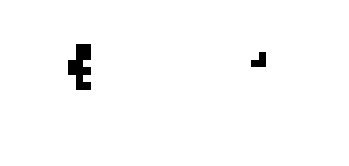

tensor([0.0069, 0.1502, 0.1726, 0.5420, 0.0183, 0.1101])


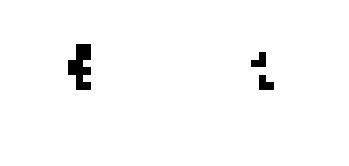

tensor([0.9150, 0.0850])


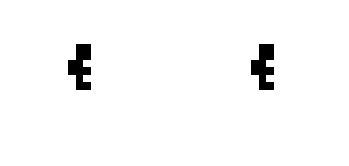

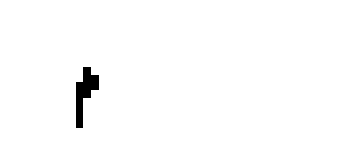

tensor([0.0015, 0.0332, 0.0009, 0.0006, 0.0650, 0.1520, 0.1302, 0.0017, 0.0009,
        0.0012, 0.0008, 0.3589, 0.0287, 0.0010, 0.0342, 0.0006, 0.1847, 0.0020,
        0.0021])


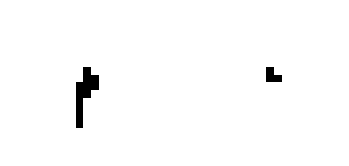

tensor([0.0898, 0.0019, 0.0012, 0.1858, 0.0019, 0.0776, 0.0927, 0.5395, 0.0047,
        0.0049])


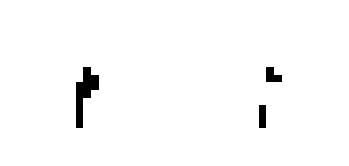

tensor([0.2494, 0.0047, 0.0029, 0.5229, 0.0048, 0.2153])


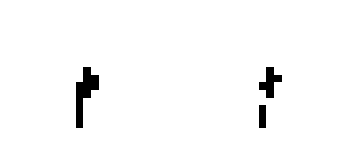

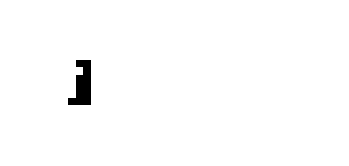

tensor([1.7389e-01, 7.5132e-04, 4.8161e-04, 6.1836e-02, 9.4575e-04, 6.2202e-04,
        1.4644e-01, 1.2484e-01, 1.5194e-03, 4.1378e-02, 7.5018e-04, 6.1256e-04,
        2.5511e-01, 6.8595e-04, 6.3946e-04, 4.3337e-03, 2.1634e-03, 2.5406e-04,
        5.3424e-04, 1.7854e-01, 1.7835e-03, 1.8797e-03])


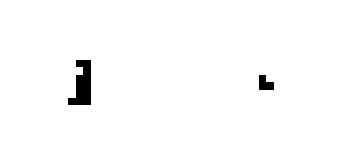

tensor([0.0042, 0.0035, 0.7402, 0.2127, 0.0043, 0.0232, 0.0119])


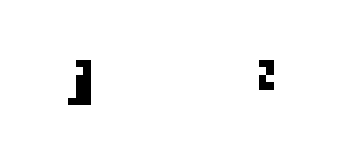

tensor([0.0186, 0.8670, 0.0189, 0.0955])


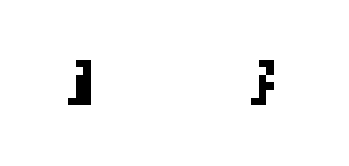

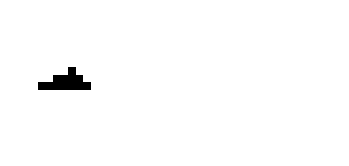

tensor([0.0428, 0.0028, 0.0022, 0.0021, 0.2033, 0.0036, 0.0570, 0.0029, 0.0050,
        0.0018, 0.0011, 0.3548, 0.0796, 0.0009, 0.0010, 0.0038, 0.0059, 0.1051,
        0.0013, 0.0011, 0.0744, 0.0018, 0.0019, 0.0439])


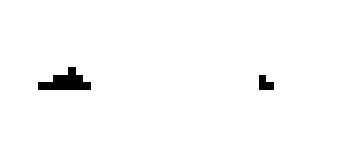

tensor([0.0081, 0.0064, 0.4293, 0.0103, 0.0083, 0.0137, 0.0053, 0.0033, 0.2305,
        0.1693, 0.0052, 0.0057, 0.1047])


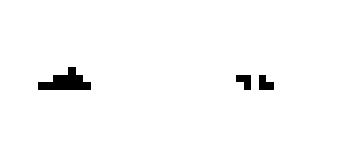

tensor([0.6125, 0.3875])


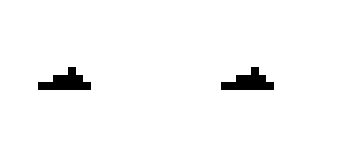

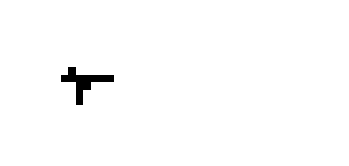

tensor([0.0028, 0.0038, 0.0031, 0.0804, 0.0059, 0.0054, 0.4531, 0.0011, 0.0034,
        0.0362, 0.0007, 0.0063, 0.0712, 0.0020, 0.3231, 0.0013])


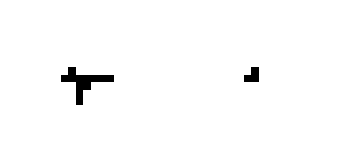

tensor([0.0045, 0.0063, 0.0050, 0.1687, 0.0017, 0.0708, 0.0010, 0.0106, 0.7294,
        0.0020])


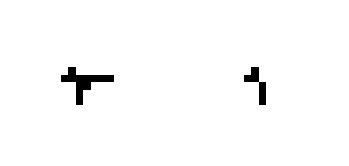

tensor([0.0117, 0.6951, 0.2624, 0.0022, 0.0285])


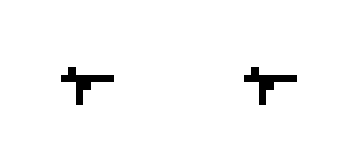

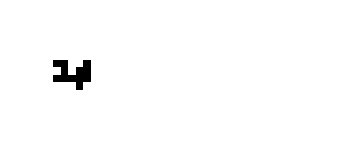

tensor([2.0498e-01, 1.8028e-03, 8.7620e-04, 1.7198e-01, 8.4417e-02, 2.1202e-03,
        5.0954e-02, 8.7365e-04, 4.2212e-01, 1.5311e-03, 9.7187e-04, 5.7873e-03,
        5.1232e-04, 5.9462e-04, 4.7142e-02, 2.9537e-03, 3.7554e-04])


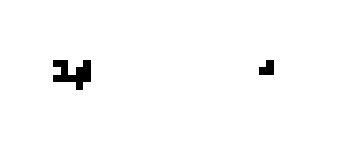

tensor([0.5229, 0.0036, 0.4426, 0.0040, 0.0204, 0.0023, 0.0026, 0.0017])


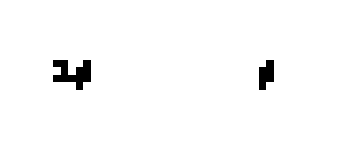

tensor([0.9679, 0.0042, 0.0263, 0.0016])


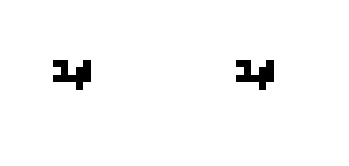

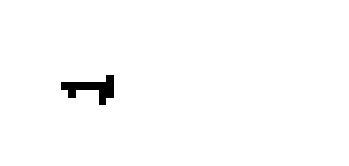

tensor([3.3395e-04, 3.8735e-01, 1.7286e-03, 3.8389e-04, 3.3173e-02, 8.3818e-02,
        3.6844e-01, 8.9905e-04, 1.4827e-03, 1.6216e-02, 3.0220e-04, 2.0540e-04,
        2.8093e-03, 2.4791e-04, 1.0135e-01, 1.2537e-03])


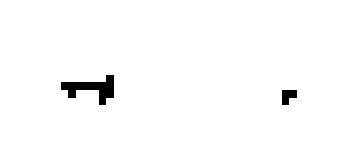

tensor([0.1060, 0.8226, 0.0551, 0.0017, 0.0012, 0.0120, 0.0014])


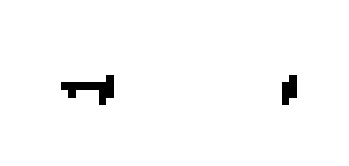

tensor([0.6633, 0.2939, 0.0399, 0.0030])


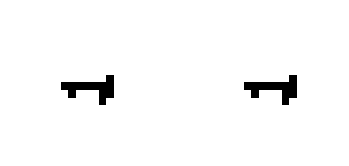

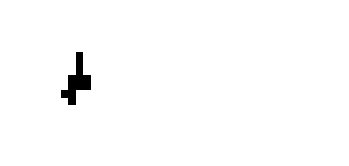

tensor([1.0035e-01, 1.8249e-02, 1.5330e-03, 9.2724e-04, 3.7940e-04, 8.4378e-02,
        7.2153e-02, 2.4211e-02, 4.5899e-04, 3.8745e-01, 1.4654e-01, 3.3577e-02,
        3.9119e-04, 2.5996e-03, 2.1682e-04, 2.2386e-02, 3.2740e-04, 5.1208e-04,
        6.7495e-04, 1.0268e-01])


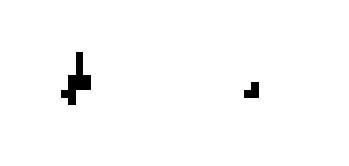

tensor([0.2666, 0.0026, 0.0011, 0.3943, 0.0011, 0.0006, 0.0619, 0.0009, 0.2709])


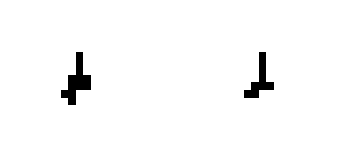

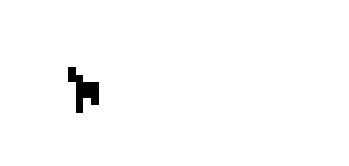

tensor([0.2837, 0.0011, 0.0007, 0.0248, 0.0004, 0.0226, 0.0580, 0.2623, 0.0004,
        0.1005, 0.0232, 0.1369, 0.0012, 0.0110, 0.0006, 0.0005, 0.0705, 0.0008,
        0.0008])


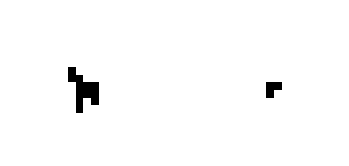

tensor([0.2144, 0.2117, 0.5471, 0.0128, 0.0140])


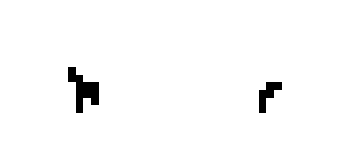

tensor([0.5089, 0.4911])


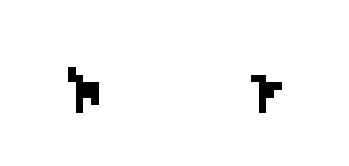

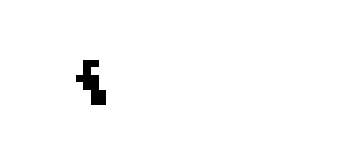

tensor([6.5649e-04, 2.3481e-01, 2.2792e-01, 2.0387e-02, 3.3411e-04, 1.9728e-04,
        1.8552e-02, 4.0919e-02, 4.8056e-04, 2.1751e-01, 3.8505e-04, 5.9927e-04,
        1.9091e-02, 1.1311e-01, 8.9802e-03, 3.0801e-04, 7.5446e-04, 1.0695e-02,
        8.4306e-02])


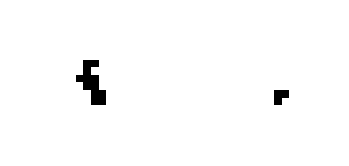

tensor([0.2715, 0.0079, 0.5308, 0.0109, 0.0089, 0.0129, 0.1342, 0.0071, 0.0159])


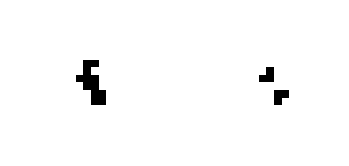

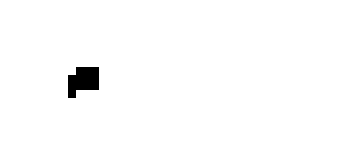

tensor([5.8414e-02, 3.6240e-04, 5.3553e-04, 9.8996e-03, 2.0614e-04, 2.6249e-01,
        2.6366e-04, 1.5111e-04, 1.7288e-04, 2.3460e-02, 1.1971e-03, 4.1677e-02,
        4.2623e-04, 3.8542e-04, 2.0613e-04, 1.6788e-04, 2.5058e-01, 8.7030e-02,
        3.0402e-04, 4.8880e-04, 1.8924e-04, 1.2308e-01, 8.5315e-03, 1.1913e-04,
        9.4354e-05, 1.0998e-04, 1.7491e-02, 1.2265e-02, 1.0107e-02, 8.9366e-02,
        2.3424e-04])


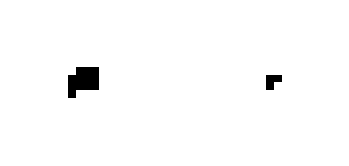

tensor([0.0090, 0.0115, 0.0094, 0.0101, 0.3994, 0.2982, 0.2624])


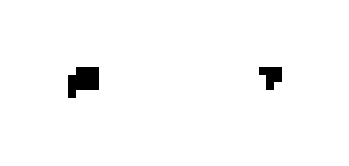

tensor([0.0272, 0.0352, 0.0302, 0.9074])


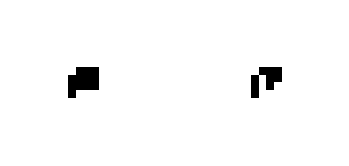

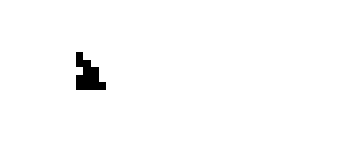

tensor([5.4281e-02, 5.8596e-04, 2.2289e-01, 2.9499e-04, 1.7281e-04, 1.7442e-02,
        4.5734e-02, 3.8990e-02, 4.7425e-04, 4.2674e-04, 1.1681e-01, 7.9676e-02,
        5.3445e-04, 1.7996e-02, 1.0988e-01, 2.1079e-01, 7.0284e-04, 8.3805e-03,
        1.3594e-04, 1.6825e-02, 6.7520e-04, 5.5757e-02, 5.5629e-04])


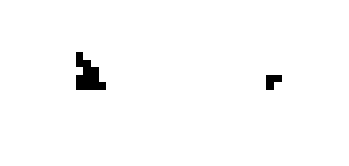

tensor([0.3009, 0.1421, 0.5570])


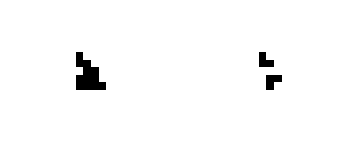

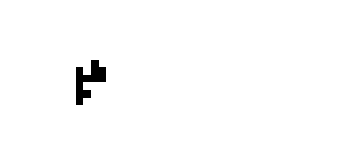

tensor([1.0086e-01, 1.9001e-02, 1.6926e-03, 4.1800e-02, 3.7523e-01, 1.4383e-03,
        7.4080e-04, 4.7102e-04, 7.8610e-04, 3.6912e-01, 3.0322e-04, 4.5087e-02,
        2.3140e-02, 1.9582e-02, 1.8200e-04, 5.7579e-04])


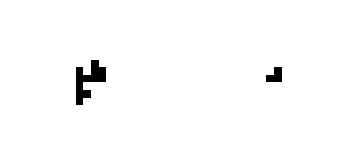

tensor([0.2981, 0.0041, 0.3904, 0.3060, 0.0014])


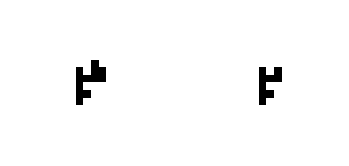

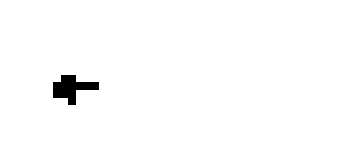

tensor([1.8414e-04, 1.8943e-01, 1.8304e-01, 3.9617e-04, 3.7357e-02, 6.5898e-04,
        1.0097e-03, 7.0112e-04, 1.7798e-01, 9.5824e-02, 3.3048e-04, 1.9863e-04,
        1.5695e-04, 8.9949e-02, 1.7340e-01, 6.8943e-04, 6.7648e-03, 1.0018e-04,
        1.9274e-02, 1.3662e-02, 3.2294e-04, 8.0476e-03, 6.2106e-05, 4.6389e-04])


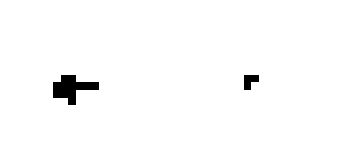

tensor([0.0072, 0.0024, 0.7892, 0.0488, 0.0013, 0.0919, 0.0593])


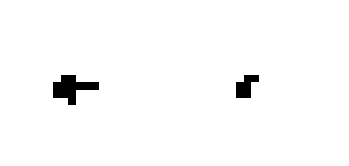

tensor([0.4516, 0.0114, 0.5370])


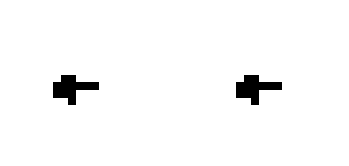

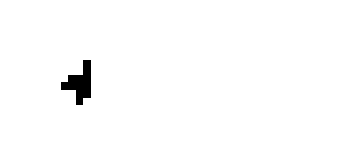

tensor([9.4619e-02, 4.0948e-04, 3.8918e-01, 1.4477e-03, 3.3752e-02, 5.1627e-04,
        8.3567e-04, 3.3957e-04, 6.8152e-02, 8.2967e-04, 2.2478e-02, 4.0911e-04,
        7.3103e-04, 1.3925e-01, 3.7311e-04, 1.2276e-03, 2.3610e-03, 1.9211e-04,
        2.2308e-04, 1.1797e-03, 1.4211e-01, 9.7393e-02, 9.7053e-04, 1.0217e-03])


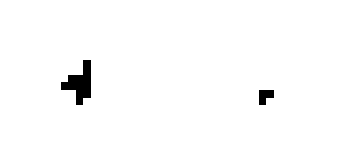

tensor([0.0020, 0.0013, 0.1853, 0.0032, 0.0652, 0.0016, 0.3610, 0.0015, 0.0082,
        0.0008, 0.0009, 0.0043, 0.3647])


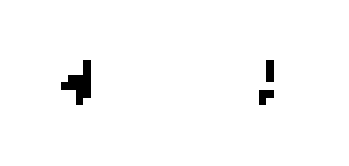

tensor([0.0047, 0.1654, 0.0060, 0.7905, 0.0053, 0.0251, 0.0031])


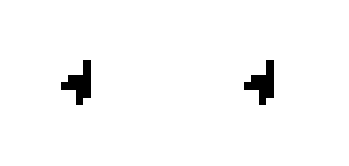

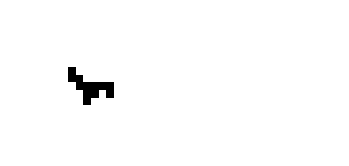

tensor([0.0341, 0.0010, 0.0006, 0.0654, 0.0012, 0.1506, 0.0743, 0.0010, 0.2587,
        0.0009, 0.3468, 0.0294, 0.0006, 0.0004, 0.0352])


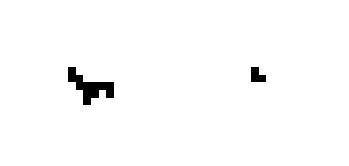

tensor([0.1445, 0.0051, 0.0033, 0.2613, 0.0062, 0.2947, 0.0051, 0.1243, 0.0030,
        0.0021, 0.1504])


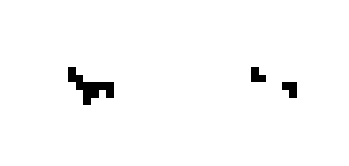

tensor([0.3333, 0.0157, 0.0154, 0.2889, 0.3466])


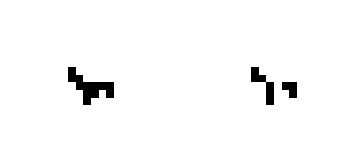

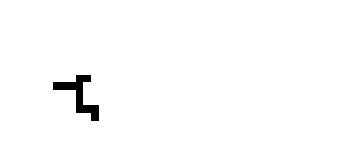

tensor([0.1894, 0.0010, 0.0802, 0.0010, 0.3571, 0.0061, 0.0006, 0.0868, 0.2748,
        0.0013, 0.0017])


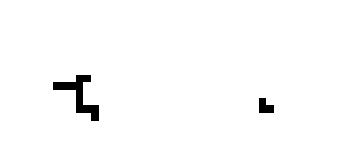

tensor([9.7967e-01, 1.5624e-03, 1.5388e-03, 1.3243e-02, 7.9980e-04, 3.1893e-03])


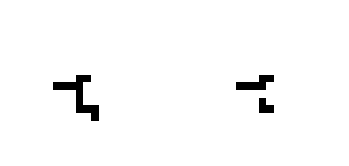

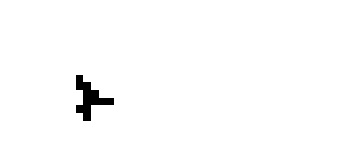

tensor([0.0164, 0.0015, 0.0319, 0.0009, 0.0739, 0.0215, 0.3272, 0.1273, 0.0298,
        0.0004, 0.3205, 0.0024, 0.0281, 0.0170, 0.0005, 0.0007])


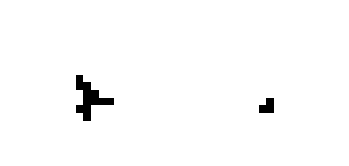

tensor([5.2508e-02, 9.6942e-04, 2.3687e-01, 3.9978e-04, 6.6387e-01, 4.5382e-02])


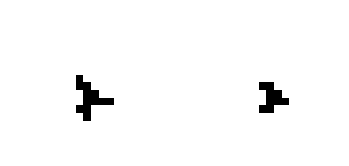

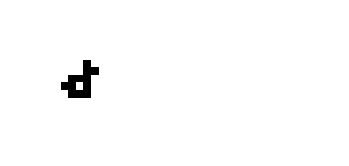

tensor([1.0742e-03, 6.3930e-04, 4.2712e-02, 3.9263e-02, 8.4507e-02, 2.9252e-02,
        1.1059e-03, 2.2504e-01, 4.1576e-01, 3.5809e-04, 3.7862e-02, 7.2716e-04,
        1.7583e-03, 1.1841e-01, 1.5384e-03])


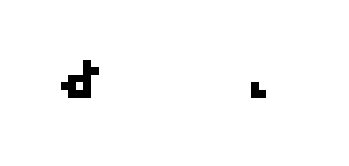

tensor([0.0051, 0.3156, 0.6575, 0.0016, 0.0034, 0.0091, 0.0078])


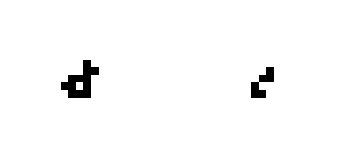

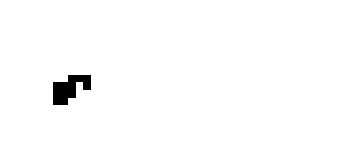

tensor([2.4566e-04, 2.3554e-01, 8.2679e-04, 2.2863e-01, 8.6526e-04, 1.9921e-02,
        1.8037e-02, 1.3153e-03, 9.1944e-04, 1.3364e-02, 7.0418e-04, 1.1995e-01,
        4.3726e-04, 3.7699e-04, 2.1584e-01, 7.3313e-04, 1.3412e-04, 4.2662e-04,
        4.7227e-04, 8.3536e-02, 3.6209e-04, 5.7363e-02])


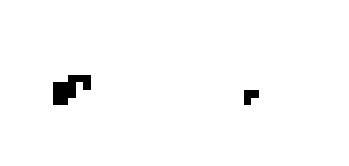

tensor([0.2256, 0.1547, 0.0020, 0.0067, 0.6109])


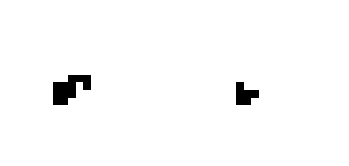

tensor([0.6181, 0.3805, 0.0013])


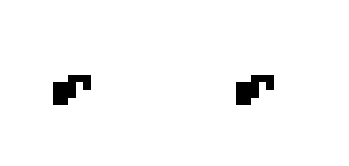

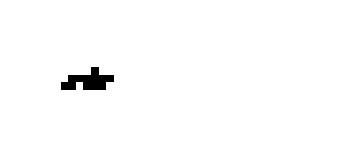

tensor([1.2250e-03, 1.9451e-02, 1.6520e-03, 4.2704e-01, 3.8157e-02, 6.2368e-04,
        1.0006e-03, 9.9773e-04, 8.9603e-04, 2.5778e-02, 4.0781e-01, 1.1193e-03,
        3.5715e-02, 4.5337e-04, 1.6807e-02, 2.8927e-04, 1.9429e-04, 2.3520e-04,
        5.3626e-04, 2.0018e-02])


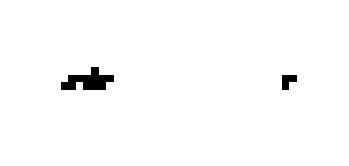

tensor([0.0820, 0.0014, 0.0023, 0.0021, 0.8277, 0.0025, 0.0364, 0.0012, 0.0443])


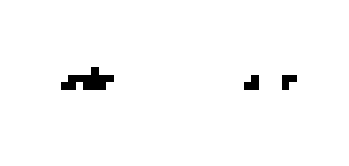

tensor([0.4753, 0.0105, 0.0180, 0.2246, 0.2717])


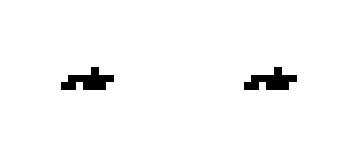

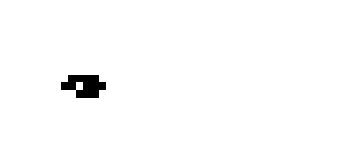

tensor([1.2587e-03, 5.0937e-04, 1.6986e-03, 1.3896e-03, 3.9877e-02, 6.3914e-04,
        3.7612e-04, 9.1955e-04, 2.6845e-02, 4.3097e-01, 1.4464e-03, 1.1500e-03,
        7.7844e-04, 4.2383e-01, 1.7485e-02, 1.9812e-04, 2.7892e-04, 4.9038e-02,
        5.6729e-04, 7.4733e-04])


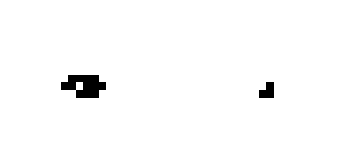

tensor([1.1691e-03, 3.2302e-03, 1.4935e-03, 9.5150e-01, 4.0164e-02, 6.4549e-04,
        1.7934e-03])


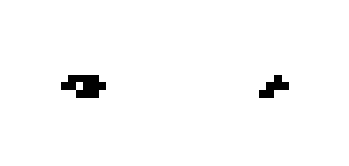

tensor([0.6341, 0.3659])


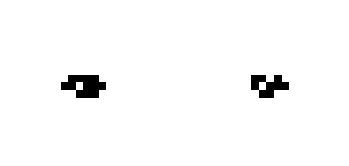

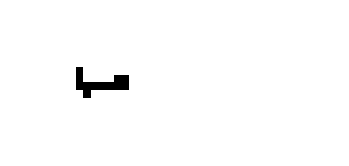

tensor([0.0580, 0.0045, 0.1099, 0.1246, 0.0047, 0.0077, 0.4296, 0.0017, 0.0501,
        0.0008, 0.0010, 0.1350, 0.0021, 0.0703])


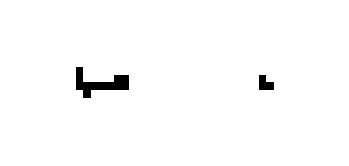

tensor([0.0159, 0.4431, 0.0161, 0.0273, 0.0034, 0.4869, 0.0073])


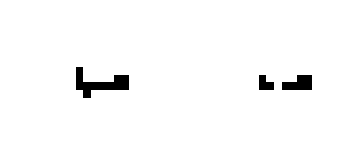

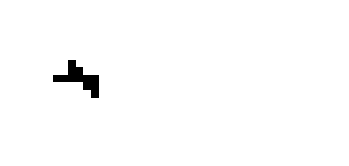

tensor([1.5514e-03, 4.0986e-04, 4.7030e-02, 7.9773e-04, 4.7160e-04, 5.3590e-02,
        1.1415e-03, 6.3469e-04, 5.2003e-04, 1.8963e-01, 1.4201e-03, 5.4090e-04,
        4.8411e-01, 2.0833e-02, 3.5270e-03, 3.0292e-04, 3.5140e-04, 4.5464e-04,
        1.9268e-01])


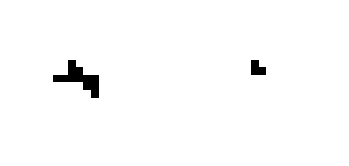

tensor([0.0075, 0.1817, 0.0041, 0.0025, 0.0057, 0.0851, 0.0164, 0.0016, 0.0019,
        0.6935])


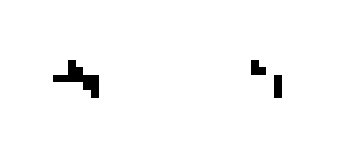

tensor([0.8641, 0.1061, 0.0138, 0.0160])


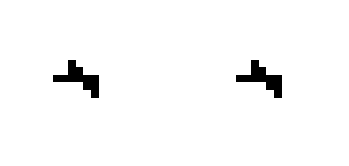

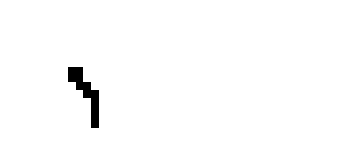

tensor([0.2786, 0.0264, 0.0244, 0.0603, 0.0014, 0.2525, 0.1031, 0.0249, 0.1369,
        0.0170, 0.0727, 0.0009, 0.0010])


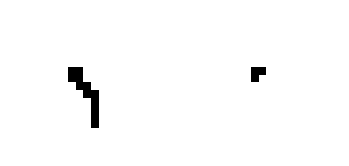

tensor([0.1014, 0.0932, 0.4191, 0.0956, 0.2845, 0.0030, 0.0031])


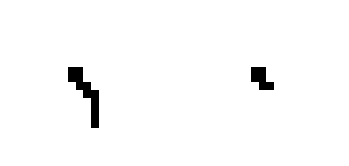

tensor([0.2746, 0.6916, 0.0163, 0.0175])


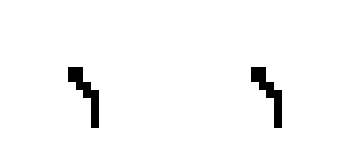

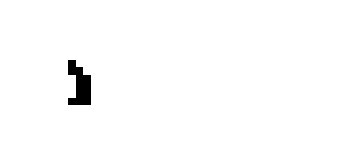

tensor([0.0513, 0.2169, 0.0008, 0.0183, 0.0003, 0.0166, 0.0433, 0.0369, 0.2025,
        0.1102, 0.0004, 0.0753, 0.0003, 0.0171, 0.1037, 0.0007, 0.0160, 0.0113,
        0.0768, 0.0003, 0.0005, 0.0006])


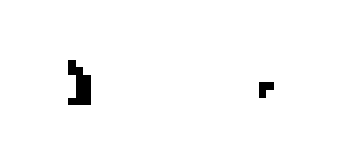

tensor([0.3281, 0.0140, 0.0119, 0.3290, 0.3171])


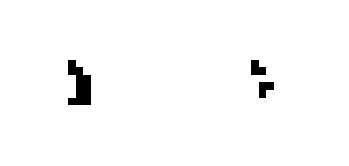

tensor([0.0268, 0.9732])


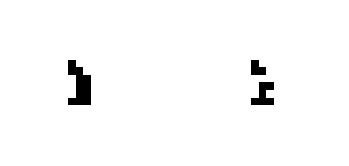

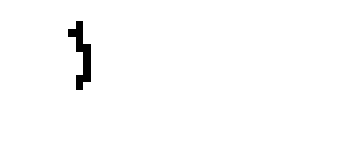

tensor([0.1279, 0.1078, 0.0540, 0.0016, 0.2531, 0.2408, 0.0022, 0.0264, 0.0003,
        0.1851, 0.0009])


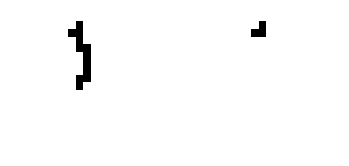

tensor([0.2605, 0.2192, 0.4514, 0.0062, 0.0617, 0.0010])


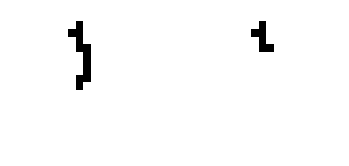

tensor([0.8389, 0.0104, 0.1508])


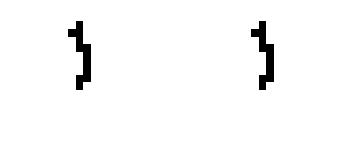

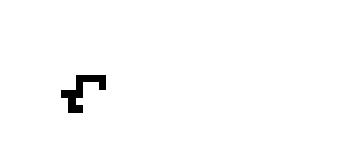

tensor([1.4177e-01, 2.8802e-03, 4.9183e-02, 1.1860e-01, 2.4241e-03, 4.7544e-01,
        5.4255e-04, 3.7909e-04, 6.4962e-02, 1.3213e-03, 1.4250e-01])


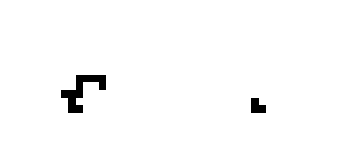

tensor([0.5519, 0.1849, 0.0076, 0.0016, 0.0011, 0.2489, 0.0041])


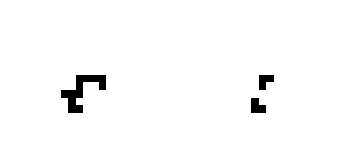

tensor([0.4222, 0.5778])


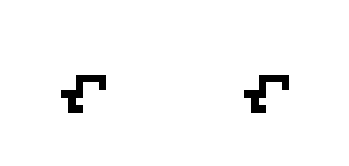

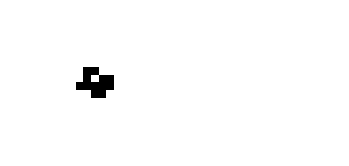

tensor([2.9253e-02, 7.4527e-04, 4.7952e-04, 6.6397e-01, 9.3759e-04, 5.5110e-04,
        6.5622e-02, 1.1529e-01, 1.3439e-03, 3.8657e-02, 6.0823e-04, 1.0735e-03,
        5.3717e-02, 6.3338e-04, 2.5272e-02, 4.3394e-04, 2.9114e-04, 8.6424e-04,
        2.5643e-04])


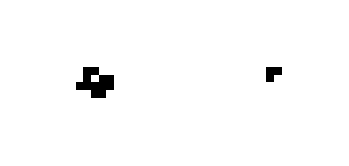

tensor([0.0065, 0.0039, 0.3367, 0.0091, 0.2079, 0.0043, 0.2808, 0.0045, 0.1390,
        0.0031, 0.0022, 0.0020])


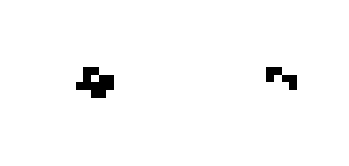

tensor([0.3319, 0.4402, 0.2221, 0.0059])


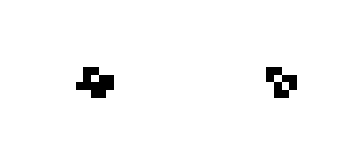

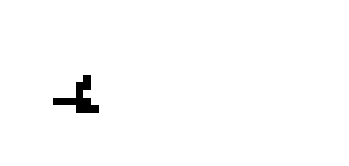

tensor([4.6441e-02, 8.2406e-04, 2.5292e-03, 4.5948e-03, 1.7812e-01, 6.1150e-02,
        1.3624e-03, 8.4074e-02, 1.1625e-03, 4.8095e-01, 6.9464e-03, 7.8976e-02,
        2.1776e-03, 2.4079e-03, 4.7839e-02, 4.4905e-04])


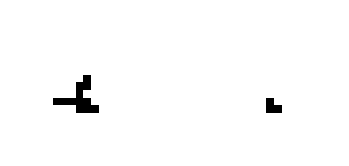

tensor([0.0022, 0.0133, 0.5747, 0.0036, 0.2513, 0.0059, 0.1478, 0.0012])


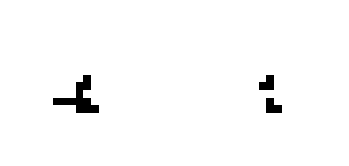

tensor([0.0314, 0.6063, 0.0134, 0.3489])


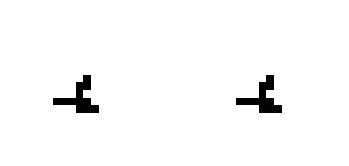

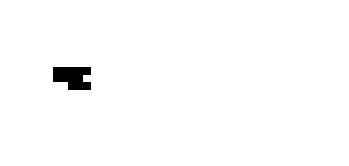

tensor([4.5928e-04, 1.1905e-02, 2.6341e-04, 1.6915e-04, 3.0078e-01, 2.1622e-02,
        5.4826e-04, 9.5838e-04, 2.6247e-04, 2.7743e-02, 1.5853e-02, 2.6347e-04,
        2.1509e-04, 2.8472e-01, 1.0167e-01, 2.2387e-02, 2.4150e-04, 2.2478e-04,
        1.4197e-01, 1.5861e-03, 1.4198e-04, 2.9655e-02, 3.3982e-04, 2.8559e-04,
        2.0857e-02, 1.4701e-02, 1.8755e-04])


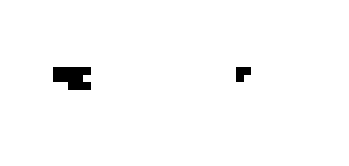

tensor([0.1041, 0.0024, 0.1323, 0.0740, 0.0011, 0.0009, 0.5047, 0.0010, 0.0009,
        0.0068, 0.0006, 0.1003, 0.0701, 0.0008])


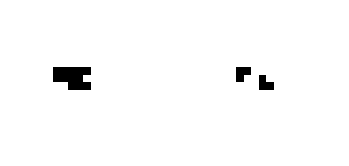

tensor([0.3610, 0.2875, 0.3437, 0.0078])


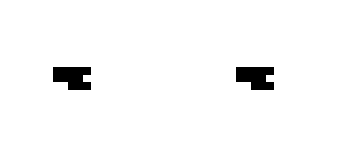

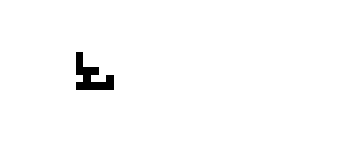

tensor([0.0255, 0.1086, 0.0941, 0.2568, 0.0011, 0.2443, 0.0221, 0.0005, 0.0003,
        0.0589, 0.0009, 0.1870])


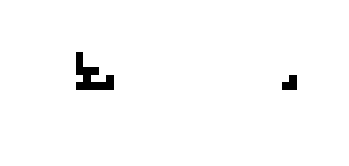

tensor([0.0442, 0.1719, 0.0024, 0.3614, 0.0380, 0.0953, 0.0019, 0.2848])


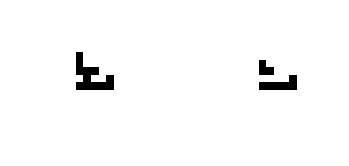

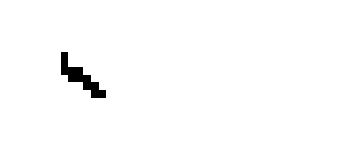

tensor([0.2261, 0.0213, 0.0002, 0.0011, 0.0241, 0.2056, 0.0833, 0.0007, 0.0201,
        0.1106, 0.2030, 0.0262, 0.0189, 0.0586])


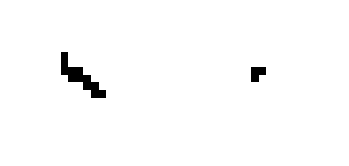

tensor([0.2200, 0.0049, 0.0121, 0.2125, 0.5506])


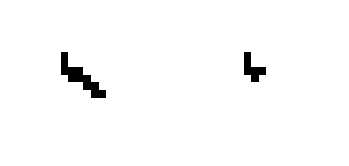

tensor([0.4952, 0.0040, 0.0128, 0.4880])


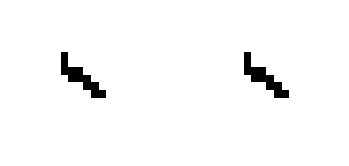

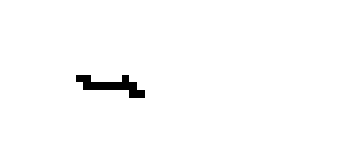

tensor([4.8465e-02, 2.7414e-03, 4.4170e-01, 1.7847e-03, 1.2473e-03, 4.3890e-01,
        3.4515e-04, 4.2461e-03, 4.1444e-04, 4.7895e-04, 5.9677e-02])


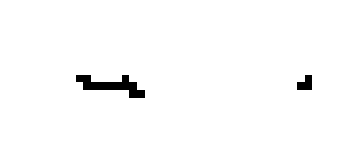

tensor([0.1222, 0.0069, 0.8542, 0.0016, 0.0150])


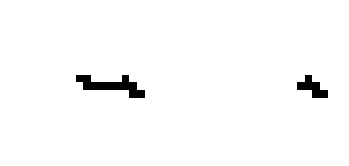

tensor([0.9265, 0.0052, 0.0683])


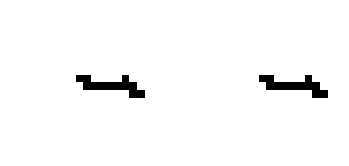

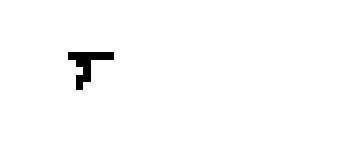

tensor([0.3978, 0.0022, 0.0045, 0.1651, 0.0108, 0.0078, 0.0043, 0.0023, 0.0077,
        0.0012, 0.1789, 0.1290, 0.0037, 0.0060, 0.0787])


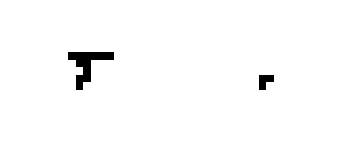

tensor([0.3008, 0.0113, 0.0078, 0.0018, 0.0072, 0.0008, 0.3307, 0.2190, 0.0031,
        0.1174])


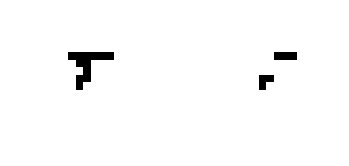

tensor([0.5524, 0.0515, 0.0394, 0.0134, 0.0394, 0.3039])


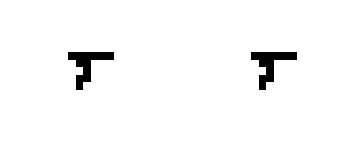

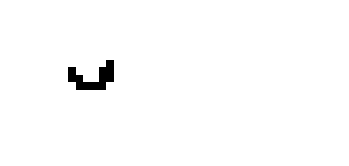

tensor([3.8729e-01, 1.7389e-03, 3.2935e-02, 4.0843e-02, 9.5422e-04, 1.4784e-03,
        1.9870e-01, 1.4115e-01, 3.3696e-02, 8.1381e-04, 1.6190e-02, 3.1740e-04,
        1.4311e-01, 7.8810e-04])


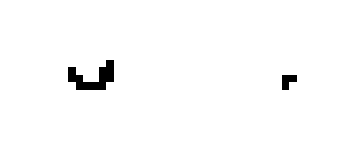

tensor([0.0956, 0.4200, 0.3393, 0.0943, 0.0508])


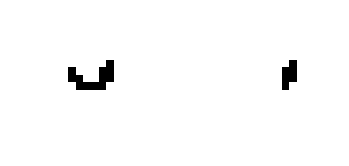

tensor([0.1268, 0.6870, 0.1338, 0.0524])


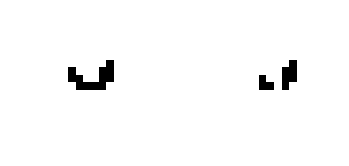

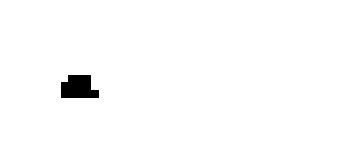

tensor([3.6140e-02, 6.1314e-03, 1.6123e-01, 1.5666e-01, 2.8166e-04, 1.2571e-02,
        3.0465e-02, 4.7540e-04, 1.2791e-04, 7.4330e-04, 2.5750e-02, 8.2326e-03,
        1.5350e-01, 8.1203e-02, 2.3584e-04, 1.3949e-04, 5.3675e-02, 1.1628e-02,
        1.1836e-04, 7.5889e-02, 1.4997e-01, 5.0270e-04, 7.9263e-04, 1.5450e-02,
        1.6726e-04, 1.0803e-02, 2.2946e-04, 2.5438e-04, 6.2539e-03, 4.1931e-05,
        3.3327e-04])


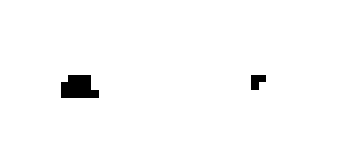

tensor([6.9078e-02, 1.3527e-01, 4.8759e-02, 1.3535e-03, 6.5394e-02, 1.1554e-03,
        6.0728e-01, 6.2987e-03, 6.2599e-02, 2.3275e-03, 4.8147e-04])


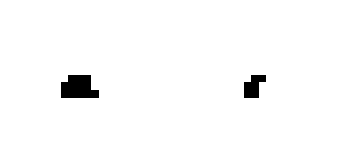

tensor([0.2643, 0.5426, 0.1751, 0.0170, 0.0010])


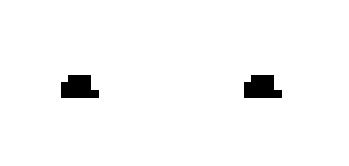

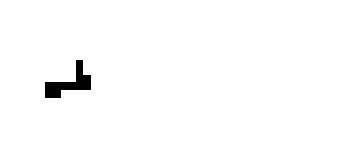

tensor([5.4893e-02, 2.2081e-01, 7.6125e-04, 9.7128e-04, 2.2688e-02, 3.9684e-02,
        2.3283e-04, 2.0274e-01, 7.9624e-02, 1.0715e-01, 1.9977e-01, 1.5477e-03,
        1.3657e-04, 1.5830e-04, 3.5242e-04, 1.2616e-02, 5.5873e-02])


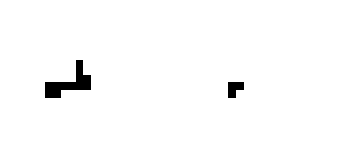

tensor([0.0612, 0.1057, 0.0009, 0.2013, 0.4500, 0.0006, 0.0007, 0.0366, 0.1431])


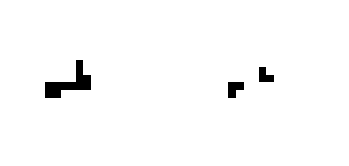

tensor([0.4695, 0.5305])


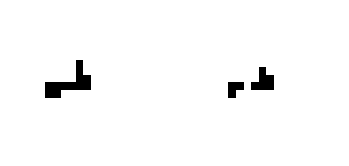

Success ratio: 49.0%


In [14]:
mcts1.eval()

with torch.no_grad():
    success_ratio = 0
    for eval_num in range(1,n_evals+1):
        env.reset()
        tree = MCTSnetTree(env, embedding_size, device)
        done = False
        while not done:
            if render:
                env.render()
            if meta_control and not internal_control:
                M_probs = M(tree.get_root().get_state())
                M_probs = torch.squeeze(M_probs)
                #M_m = Categorical(M_probs)
                #M_action = M_m.sample()
                #n_simuls = M_action.item()+1
                n_simuls = torch.argmax(M_probs).item()+1
            probs, action_mask = mctsnet(tree, M, n_simuls, gamma, internal_control)
            probs = torch.squeeze(probs)
            action_mask = torch.tensor(action_mask).to(device)
            masked_probs = probs*action_mask 
            if not torch.sum(masked_probs.clone()) > 0:
                masked_probs += action_mask
            masked_probs /= torch.sum(masked_probs)
            print(masked_probs[masked_probs>0])
            m = Categorical(masked_probs)
            #action = m.sample().item()
            action = torch.argmax(masked_probs)
            action_id = action.item()
            block = action_id//(3*n_blocks)
            loc = action_id - block*3*n_blocks
            env_action = np.array([block,loc])
            if meta_control and internal_control:
                n_simuls = M.get_saved_n_simuls()[-1]
            env_state, env_reward, done = env.step(env_action)

            state = torch.unsqueeze(torch.tensor(env_state[:2]), 0).to(device)
            reward = torch.unsqueeze(torch.tensor([env_reward]), 0).to(device)
            for (child_id, child) in tree.get_root().get_children():
                if child_id == action_id:
                    child.set_state(state)
                    child.set_reward(reward)
                    child.set_done(done)
                    child.set_action(torch.reshape(-m.log_prob(action), (1,1)))
                    child.set_action_mask(tree.get_env().get_mask())
                    tree.set_root(child)
                    break
        if env_reward == 1:
            success_ratio += 1
        if render:
            env.render()
    success_ratio *= 100/n_evals
    print("Success ratio: {}%".format(success_ratio))